In [44]:
import pandas as pd
import numpy as np
import os
import tqdm
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim

In [2]:
X=np.load("C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/all/X.npy")
Y=np.load("C:/Users/PARIKALP/AppData/Local/Programs/Python/Scripts/all/Y.npy")

In [5]:
X.shape,Y.shape

((5547, 50, 50, 3), (5547,))

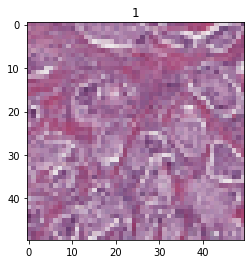

In [7]:
plt.imshow(X[5546])
plt.title(Y[5546])
plt.show()

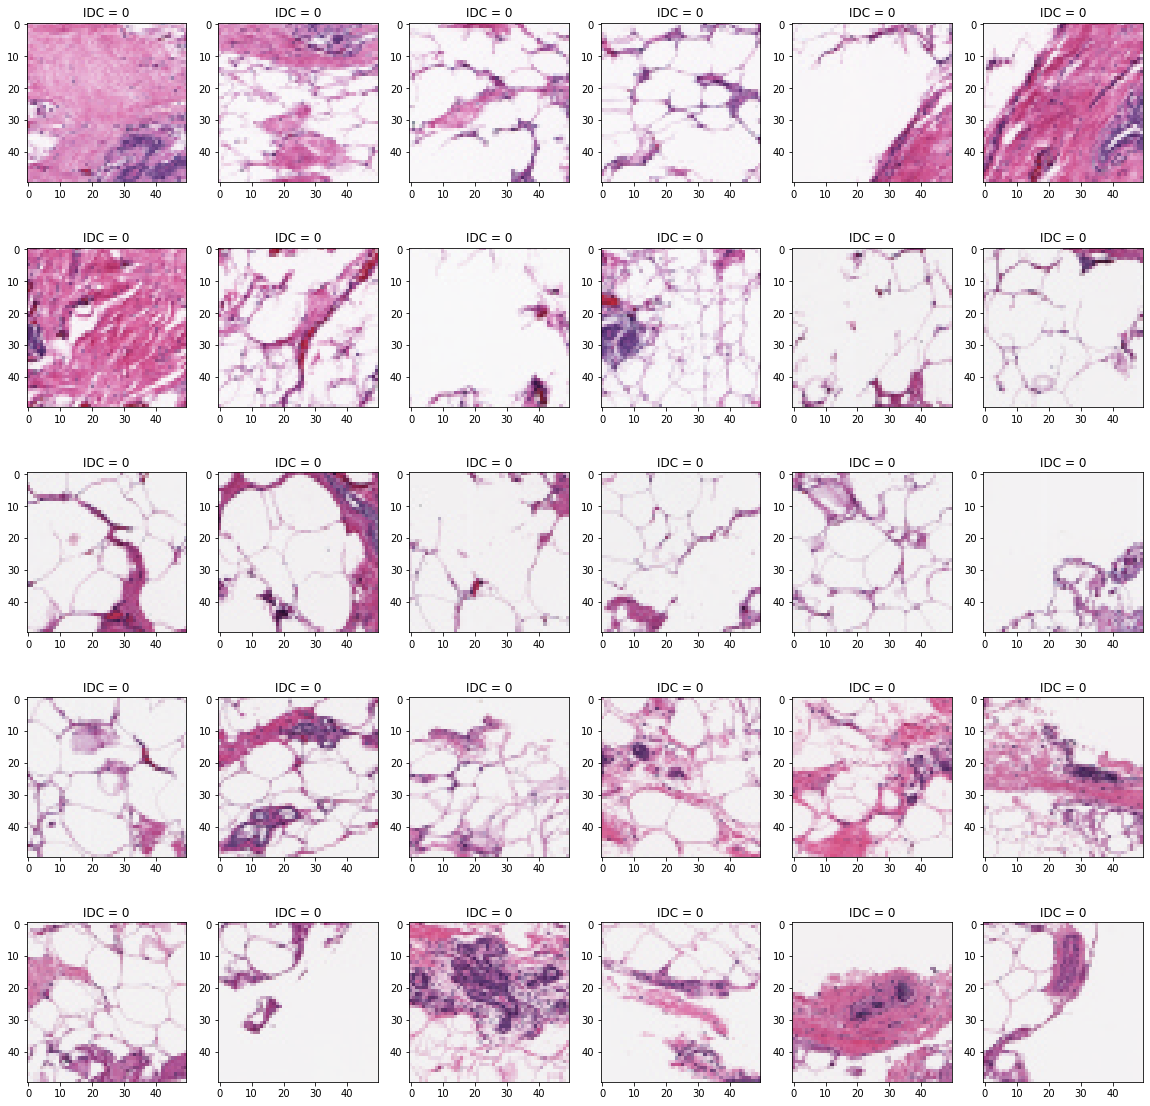

In [10]:
plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.title('IDC = %d'%Y[i])
    plt.imshow(X[i])

In [12]:
X.shape,Y.shape

((5547, 50, 50, 3), (5547,))

In [15]:
a=torch.range(1,16)
a

c:\users\parikalp\appdata\local\programs\python\lib\site-packages\ipykernel_launcher.py:1: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  """Entry point for launching an IPython kernel.


tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16.])

In [22]:
b=a.view(4,2,4)
b

RuntimeError: shape '[4, 2, 4]' is invalid for input of size 16

In [60]:
x=torch.Tensor([x for x in X]).view(-1,1,50,50)
y=torch.Tensor([y for y in Y])

In [61]:
x.shape

torch.Size([16641, 1, 50, 50])

In [33]:
x.shape,y.shape

(torch.Size([16641, 50, 50]), torch.Size([5547]))

In [34]:
x=x/255.0

In [37]:
x.shape,y.shape

(torch.Size([16641, 50, 50]), torch.Size([5547]))

In [62]:
x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
# *x[0].shape[2]

2500

In [76]:
x.shape,y.shape

(torch.Size([16641, 1, 50, 50]), torch.Size([5547]))

In [38]:
VAL_PCT=0.1
val_size=int(len(x)*VAL_PCT)
#print(val_size)

train_x = x[:-val_size]
train_y = y[:-val_size]

test_x = x[-val_size:]
test_y = y[-val_size:]

In [71]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,32,5,1)
        self.conv2 = nn.Conv2d(32,64,5,1)
        self.conv3 = nn.Conv2d(64,128,5)

        x= torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear,512)
        self.fc2 = nn.Linear(512,1)
    def convs(self, x):

        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv3(x)),(2,2))

        print(x[0].shape)

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]

        return x
    def forward(self, x):
        x= self.convs(x)
        x= x.view(-1, self._to_linear)
        x= F.relu(self.fc1(x))
        x= self.fc2(x)

        return F.softmax(x, dim=1)
net = Net()
print(net)

torch.Size([128, 2, 2])
Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=1, bias=True)
)


In [72]:
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

In [75]:
BATCH_SIZE = 10
EPOCHS = 1

for epoch in range(EPOCHS):
    for i in tqdm.tqdm(range(0, len(train_x), BATCH_SIZE)):
        print(f"{i}:{i+BATCH_SIZE}")
        batch_x = train_x[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]    
        net.zero_grad()

        outputs = net(batch_x)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        optimizer.step()   

    print(f"Epoch: {epoch}. Loss: {loss.data}")

  0%|                                                                                         | 0/1498 [00:00<?, ?it/s]c:\users\parikalp\appdata\local\programs\python\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0:10
torch.Size([128, 2, 2])


  0%|                                                                                 | 2/1498 [00:00<05:28,  4.55it/s]

10:20
torch.Size([128, 2, 2])
20:30
torch.Size([128, 2, 2])

  0%|▏                                                                                | 3/1498 [00:00<04:43,  5.27it/s]


30:40
torch.Size([128, 2, 2])


  0%|▎                                                                                | 5/1498 [00:00<03:57,  6.28it/s]

40:50
torch.Size([128, 2, 2])
50:60
torch.Size([128, 2, 2])


  0%|▍                                                                                | 7/1498 [00:01<03:38,  6.83it/s]

60:70
torch.Size([128, 2, 2])
70:80
torch.Size([128, 2, 2])

  1%|▍                                                                                | 8/1498 [00:01<03:37,  6.84it/s]


80:90
torch.Size([128, 2, 2])


  1%|▌                                                                               | 10/1498 [00:01<03:45,  6.59it/s]

90:100
torch.Size([128, 2, 2])
100:110


  1%|▌                                                                               | 11/1498 [00:01<03:32,  7.00it/s]

torch.Size([128, 2, 2])
110:120
torch.Size([128, 2, 2])


  1%|▋                                                                               | 13/1498 [00:01<03:44,  6.61it/s]

120:130
torch.Size([128, 2, 2])
130:140


  1%|▋                                                                               | 14/1498 [00:02<03:44,  6.61it/s]

torch.Size([128, 2, 2])
140:150
torch.Size([128, 2, 2])

  1%|▊                                                                               | 15/1498 [00:02<04:03,  6.10it/s]


150:160
torch.Size([128, 2, 2])


  1%|▉                                                                               | 17/1498 [00:02<04:05,  6.03it/s]

160:170
torch.Size([128, 2, 2])
170:180
torch.Size([128, 2, 2])

  1%|▉                                                                               | 18/1498 [00:02<03:59,  6.18it/s]


180:190
torch.Size([128, 2, 2])


  1%|█                                                                               | 20/1498 [00:03<03:59,  6.18it/s]

190:200
torch.Size([128, 2, 2])
200:210


  1%|█                                                                               | 21/1498 [00:03<03:57,  6.21it/s]

torch.Size([128, 2, 2])
210:220
torch.Size([128, 2, 2])


  2%|█▏                                                                              | 23/1498 [00:03<03:46,  6.51it/s]

220:230
torch.Size([128, 2, 2])
230:240


  2%|█▎                                                                              | 24/1498 [00:03<03:59,  6.16it/s]

torch.Size([128, 2, 2])
240:250
torch.Size([128, 2, 2])

  2%|█▎                                                                              | 25/1498 [00:03<04:01,  6.11it/s]


250:260
torch.Size([128, 2, 2])


  2%|█▍                                                                              | 27/1498 [00:04<04:02,  6.07it/s]

260:270
torch.Size([128, 2, 2])
270:280


  2%|█▍                                                                              | 28/1498 [00:04<03:58,  6.17it/s]

torch.Size([128, 2, 2])
280:290
torch.Size([128, 2, 2])


  2%|█▌                                                                              | 30/1498 [00:04<03:54,  6.26it/s]

290:300
torch.Size([128, 2, 2])
300:310


  2%|█▋                                                                              | 31/1498 [00:04<03:47,  6.46it/s]

torch.Size([128, 2, 2])
310:320
torch.Size([128, 2, 2])


  2%|█▋                                                                              | 32/1498 [00:04<03:40,  6.64it/s]

320:330
torch.Size([128, 2, 2])


  2%|█▊                                                                              | 33/1498 [00:05<04:43,  5.17it/s]

330:340
torch.Size([128, 2, 2])


  2%|█▊                                                                              | 34/1498 [00:05<06:24,  3.81it/s]

340:350
torch.Size([128, 2, 2])


  2%|█▉                                                                              | 36/1498 [00:06<05:42,  4.27it/s]

350:360
torch.Size([128, 2, 2])
360:370
torch.Size([128, 2, 2])

  2%|█▉                                                                              | 37/1498 [00:06<05:07,  4.76it/s]


370:380
torch.Size([128, 2, 2])


  3%|██                                                                              | 39/1498 [00:06<04:26,  5.47it/s]

380:390
torch.Size([128, 2, 2])
390:400
torch.Size([128, 2, 2])


  3%|██▏                                                                             | 41/1498 [00:06<04:09,  5.85it/s]

400:410
torch.Size([128, 2, 2])
410:420
torch.Size([128, 2, 2])

  3%|██▏                                                                             | 42/1498 [00:07<03:58,  6.12it/s]


420:430
torch.Size([128, 2, 2])


  3%|██▎                                                                             | 44/1498 [00:07<03:46,  6.41it/s]

430:440
torch.Size([128, 2, 2])
440:450


  3%|██▍                                                                             | 45/1498 [00:07<03:48,  6.35it/s]

torch.Size([128, 2, 2])
450:460
torch.Size([128, 2, 2])


  3%|██▌                                                                             | 47/1498 [00:07<03:41,  6.56it/s]

460:470
torch.Size([128, 2, 2])
470:480
torch.Size([128, 2, 2])

  3%|██▌                                                                             | 48/1498 [00:07<03:40,  6.58it/s]


480:490
torch.Size([128, 2, 2])


  3%|██▋                                                                             | 50/1498 [00:08<03:27,  6.97it/s]

490:500
torch.Size([128, 2, 2])
500:510
torch.Size([128, 2, 2])


  3%|██▊                                                                             | 52/1498 [00:08<03:30,  6.88it/s]

510:520
torch.Size([128, 2, 2])
520:530
torch.Size([128, 2, 2])

  4%|██▊                                                                             | 53/1498 [00:08<03:34,  6.73it/s]


530:540
torch.Size([128, 2, 2])


  4%|██▉                                                                             | 55/1498 [00:09<03:46,  6.38it/s]

540:550
torch.Size([128, 2, 2])
550:560


  4%|██▉                                                                             | 56/1498 [00:09<03:44,  6.41it/s]

torch.Size([128, 2, 2])
560:570
torch.Size([128, 2, 2])


  4%|███                                                                             | 58/1498 [00:09<03:45,  6.38it/s]

570:580
torch.Size([128, 2, 2])
580:590


  4%|███▏                                                                            | 59/1498 [00:09<03:44,  6.42it/s]

torch.Size([128, 2, 2])
590:600
torch.Size([128, 2, 2])


  4%|███▎                                                                            | 61/1498 [00:09<03:45,  6.37it/s]

600:610
torch.Size([128, 2, 2])
610:620
torch.Size([128, 2, 2])

  4%|███▎                                                                            | 62/1498 [00:10<03:39,  6.54it/s]


620:630
torch.Size([128, 2, 2])


  4%|███▍                                                                            | 64/1498 [00:10<03:34,  6.69it/s]

630:640
torch.Size([128, 2, 2])
640:650
torch.Size([128, 2, 2])

  4%|███▍                                                                            | 65/1498 [00:10<03:32,  6.74it/s]


650:660
torch.Size([128, 2, 2])


  4%|███▌                                                                            | 67/1498 [00:10<03:34,  6.66it/s]

660:670
torch.Size([128, 2, 2])
670:680
torch.Size([128, 2, 2])


  5%|███▋                                                                            | 68/1498 [00:11<04:50,  4.92it/s]

680:690
torch.Size([128, 2, 2])


  5%|███▋                                                                            | 70/1498 [00:11<05:57,  3.99it/s]

690:700
torch.Size([128, 2, 2])


  5%|███▊                                                                            | 71/1498 [00:11<05:14,  4.54it/s]

700:710
torch.Size([128, 2, 2])
710:720
torch.Size([128, 2, 2])

  5%|███▊                                                                            | 72/1498 [00:12<04:41,  5.07it/s]


720:730
torch.Size([128, 2, 2])


  5%|███▉                                                                            | 74/1498 [00:12<03:59,  5.96it/s]

730:740
torch.Size([128, 2, 2])
740:750
torch.Size([128, 2, 2])

  5%|████                                                                            | 75/1498 [00:12<03:50,  6.16it/s]


750:760
torch.Size([128, 2, 2])


  5%|████                                                                            | 77/1498 [00:12<03:45,  6.30it/s]

760:770
torch.Size([128, 2, 2])
770:780


  5%|████▏                                                                           | 78/1498 [00:12<03:41,  6.42it/s]

torch.Size([128, 2, 2])
780:790
torch.Size([128, 2, 2])


  5%|████▎                                                                           | 80/1498 [00:13<03:32,  6.67it/s]

790:800
torch.Size([128, 2, 2])
800:810
torch.Size([128, 2, 2])

  5%|████▎                                                                           | 81/1498 [00:13<03:28,  6.79it/s]


810:820
torch.Size([128, 2, 2])


  6%|████▍                                                                           | 83/1498 [00:13<03:22,  7.00it/s]

820:830
torch.Size([128, 2, 2])
830:840
torch.Size([128, 2, 2])

  6%|████▍                                                                           | 84/1498 [00:13<03:23,  6.95it/s]


840:850
torch.Size([128, 2, 2])


  6%|████▌                                                                           | 86/1498 [00:14<03:26,  6.82it/s]

850:860
torch.Size([128, 2, 2])
860:870
torch.Size([128, 2, 2])

  6%|████▋                                                                           | 87/1498 [00:14<03:22,  6.98it/s]


870:880
torch.Size([128, 2, 2])


  6%|████▊                                                                           | 89/1498 [00:14<03:25,  6.87it/s]

880:890
torch.Size([128, 2, 2])
890:900
torch.Size([128, 2, 2])

  6%|████▊                                                                           | 90/1498 [00:14<03:23,  6.92it/s]


900:910
torch.Size([128, 2, 2])


  6%|████▉                                                                           | 92/1498 [00:14<03:21,  6.99it/s]

910:920
torch.Size([128, 2, 2])
920:930
torch.Size([128, 2, 2])

  6%|████▉                                                                           | 93/1498 [00:15<03:23,  6.91it/s]


930:940
torch.Size([128, 2, 2])


  6%|█████                                                                           | 95/1498 [00:15<03:17,  7.11it/s]

940:950
torch.Size([128, 2, 2])
950:960
torch.Size([128, 2, 2])


  6%|█████▏                                                                          | 97/1498 [00:15<03:16,  7.13it/s]

960:970
torch.Size([128, 2, 2])
970:980
torch.Size([128, 2, 2])


  7%|█████▎                                                                          | 99/1498 [00:15<03:19,  7.01it/s]

980:990
torch.Size([128, 2, 2])
990:1000
torch.Size([128, 2, 2])

  7%|█████▎                                                                         | 100/1498 [00:16<03:20,  6.98it/s]


1000:1010
torch.Size([128, 2, 2])


  7%|█████▍                                                                         | 102/1498 [00:16<03:19,  6.99it/s]

1010:1020
torch.Size([128, 2, 2])
1020:1030
torch.Size([128, 2, 2])

  7%|█████▍                                                                         | 103/1498 [00:16<03:17,  7.06it/s]


1030:1040
torch.Size([128, 2, 2])


  7%|█████▍                                                                         | 104/1498 [00:16<03:15,  7.13it/s]

1040:1050
torch.Size([128, 2, 2])


  7%|█████▌                                                                         | 105/1498 [00:16<04:25,  5.24it/s]

1050:1060
torch.Size([128, 2, 2])


  7%|█████▋                                                                         | 107/1498 [00:17<05:05,  4.55it/s]

1060:1070
torch.Size([128, 2, 2])


  7%|█████▋                                                                         | 108/1498 [00:17<04:39,  4.97it/s]

1070:1080
torch.Size([128, 2, 2])
1080:1090
torch.Size([128, 2, 2])

  7%|█████▋                                                                         | 109/1498 [00:17<04:12,  5.49it/s]


1090:1100
torch.Size([128, 2, 2])


  7%|█████▊                                                                         | 111/1498 [00:18<03:44,  6.17it/s]

1100:1110
torch.Size([128, 2, 2])
1110:1120
torch.Size([128, 2, 2])

  7%|█████▉                                                                         | 112/1498 [00:18<03:33,  6.51it/s]


1120:1130
torch.Size([128, 2, 2])


  8%|██████                                                                         | 114/1498 [00:18<03:26,  6.70it/s]

1130:1140
torch.Size([128, 2, 2])
1140:1150
torch.Size([128, 2, 2])

  8%|██████                                                                         | 115/1498 [00:18<03:21,  6.87it/s]


1150:1160
torch.Size([128, 2, 2])


  8%|██████▏                                                                        | 117/1498 [00:18<03:17,  6.99it/s]

1160:1170
torch.Size([128, 2, 2])
1170:1180
torch.Size([128, 2, 2])

  8%|██████▏                                                                        | 118/1498 [00:19<03:15,  7.07it/s]


1180:1190
torch.Size([128, 2, 2])


  8%|██████▎                                                                        | 120/1498 [00:19<03:18,  6.92it/s]

1190:1200
torch.Size([128, 2, 2])
1200:1210
torch.Size([128, 2, 2])

  8%|██████▍                                                                        | 121/1498 [00:19<03:17,  6.98it/s]


1210:1220
torch.Size([128, 2, 2])


  8%|██████▍                                                                        | 123/1498 [00:19<03:12,  7.14it/s]

1220:1230
torch.Size([128, 2, 2])
1230:1240
torch.Size([128, 2, 2])

  8%|██████▌                                                                        | 124/1498 [00:19<03:11,  7.19it/s]


1240:1250
torch.Size([128, 2, 2])


  8%|██████▋                                                                        | 126/1498 [00:20<03:10,  7.19it/s]

1250:1260
torch.Size([128, 2, 2])
1260:1270
torch.Size([128, 2, 2])


  9%|██████▊                                                                        | 128/1498 [00:20<03:12,  7.11it/s]

1270:1280
torch.Size([128, 2, 2])
1280:1290
torch.Size([128, 2, 2])

  9%|██████▊                                                                        | 129/1498 [00:20<03:14,  7.02it/s]


1290:1300
torch.Size([128, 2, 2])


  9%|██████▉                                                                        | 131/1498 [00:20<03:16,  6.95it/s]

1300:1310
torch.Size([128, 2, 2])
1310:1320
torch.Size([128, 2, 2])

  9%|██████▉                                                                        | 132/1498 [00:21<03:17,  6.93it/s]


1320:1330
torch.Size([128, 2, 2])


  9%|███████                                                                        | 134/1498 [00:21<03:17,  6.91it/s]

1330:1340
torch.Size([128, 2, 2])
1340:1350
torch.Size([128, 2, 2])

  9%|███████                                                                        | 135/1498 [00:21<03:14,  6.99it/s]


1350:1360
torch.Size([128, 2, 2])


  9%|███████▏                                                                       | 137/1498 [00:21<03:11,  7.11it/s]

1360:1370
torch.Size([128, 2, 2])
1370:1380
torch.Size([128, 2, 2])

  9%|███████▎                                                                       | 138/1498 [00:21<03:12,  7.08it/s]


1380:1390
torch.Size([128, 2, 2])


  9%|███████▍                                                                       | 140/1498 [00:22<03:07,  7.23it/s]

1390:1400
torch.Size([128, 2, 2])
1400:1410
torch.Size([128, 2, 2])


  9%|███████▍                                                                       | 142/1498 [00:22<03:13,  7.00it/s]

1410:1420
torch.Size([128, 2, 2])
1420:1430


 10%|███████▌                                                                       | 143/1498 [00:22<03:34,  6.32it/s]

torch.Size([128, 2, 2])
1430:1440
torch.Size([128, 2, 2])

 10%|███████▌                                                                       | 144/1498 [00:22<03:58,  5.69it/s]


1440:1450


 10%|███████▋                                                                       | 145/1498 [00:23<04:12,  5.37it/s]

torch.Size([128, 2, 2])
1450:1460
torch.Size([128, 2, 2])


 10%|███████▊                                                                       | 147/1498 [00:23<03:38,  6.19it/s]

1460:1470
torch.Size([128, 2, 2])
1470:1480
torch.Size([128, 2, 2])


 10%|███████▊                                                                       | 149/1498 [00:23<03:23,  6.64it/s]

1480:1490
torch.Size([128, 2, 2])
1490:1500
torch.Size([128, 2, 2])


 10%|███████▉                                                                       | 151/1498 [00:23<03:17,  6.81it/s]

1500:1510
torch.Size([128, 2, 2])
1510:1520
torch.Size([128, 2, 2])


 10%|████████                                                                       | 153/1498 [00:24<03:10,  7.05it/s]

1520:1530
torch.Size([128, 2, 2])
1530:1540
torch.Size([128, 2, 2])


 10%|████████▏                                                                      | 155/1498 [00:24<03:09,  7.08it/s]

1540:1550
torch.Size([128, 2, 2])
1550:1560
torch.Size([128, 2, 2])

 10%|████████▏                                                                      | 156/1498 [00:24<03:08,  7.11it/s]


1560:1570
torch.Size([128, 2, 2])


 11%|████████▎                                                                      | 158/1498 [00:24<03:06,  7.17it/s]

1570:1580
torch.Size([128, 2, 2])
1580:1590
torch.Size([128, 2, 2])

 11%|████████▍                                                                      | 159/1498 [00:25<03:06,  7.19it/s]


1590:1600
torch.Size([128, 2, 2])


 11%|████████▍                                                                      | 161/1498 [00:25<03:04,  7.25it/s]

1600:1610
torch.Size([128, 2, 2])
1610:1620
torch.Size([128, 2, 2])


 11%|████████▌                                                                      | 163/1498 [00:25<03:04,  7.22it/s]

1620:1630
torch.Size([128, 2, 2])
1630:1640
torch.Size([128, 2, 2])


 11%|████████▋                                                                      | 165/1498 [00:25<02:58,  7.45it/s]

1640:1650
torch.Size([128, 2, 2])
1650:1660
torch.Size([128, 2, 2])


 11%|████████▊                                                                      | 167/1498 [00:26<03:02,  7.30it/s]

1660:1670
torch.Size([128, 2, 2])
1670:1680
torch.Size([128, 2, 2])

 11%|████████▊                                                                      | 168/1498 [00:26<03:05,  7.16it/s]


1680:1690
torch.Size([128, 2, 2])


 11%|████████▉                                                                      | 170/1498 [00:26<03:01,  7.31it/s]

1690:1700
torch.Size([128, 2, 2])
1700:1710
torch.Size([128, 2, 2])


 11%|█████████                                                                      | 172/1498 [00:26<02:56,  7.49it/s]

1710:1720
torch.Size([128, 2, 2])
1720:1730
torch.Size([128, 2, 2])


 12%|█████████▏                                                                     | 174/1498 [00:27<02:59,  7.37it/s]

1730:1740
torch.Size([128, 2, 2])
1740:1750
torch.Size([128, 2, 2])


 12%|█████████▎                                                                     | 176/1498 [00:27<02:55,  7.52it/s]

1750:1760
torch.Size([128, 2, 2])
1760:1770
torch.Size([128, 2, 2])


 12%|█████████▍                                                                     | 178/1498 [00:27<02:47,  7.89it/s]

1770:1780
torch.Size([128, 2, 2])
1780:1790
torch.Size([128, 2, 2])


 12%|█████████▍                                                                     | 180/1498 [00:27<02:52,  7.63it/s]

1790:1800
torch.Size([128, 2, 2])
1800:1810
torch.Size([128, 2, 2])


 12%|█████████▌                                                                     | 182/1498 [00:28<02:55,  7.48it/s]

1810:1820
torch.Size([128, 2, 2])
1820:1830
torch.Size([128, 2, 2])


 12%|█████████▋                                                                     | 184/1498 [00:28<03:29,  6.27it/s]

1830:1840
torch.Size([128, 2, 2])
1840:1850
torch.Size([128, 2, 2])


 12%|█████████▊                                                                     | 186/1498 [00:28<03:35,  6.09it/s]

1850:1860
torch.Size([128, 2, 2])
1860:1870
torch.Size([128, 2, 2])


 13%|█████████▉                                                                     | 188/1498 [00:29<03:15,  6.71it/s]

1870:1880
torch.Size([128, 2, 2])
1880:1890
torch.Size([128, 2, 2])


 13%|██████████                                                                     | 190/1498 [00:29<03:02,  7.16it/s]

1890:1900
torch.Size([128, 2, 2])
1900:1910
torch.Size([128, 2, 2])


 13%|██████████▏                                                                    | 192/1498 [00:29<03:00,  7.24it/s]

1910:1920
torch.Size([128, 2, 2])
1920:1930
torch.Size([128, 2, 2])


 13%|██████████▏                                                                    | 194/1498 [00:29<02:54,  7.45it/s]

1930:1940
torch.Size([128, 2, 2])
1940:1950
torch.Size([128, 2, 2])


 13%|██████████▎                                                                    | 196/1498 [00:30<02:48,  7.70it/s]

1950:1960
torch.Size([128, 2, 2])
1960:1970
torch.Size([128, 2, 2])


 13%|██████████▍                                                                    | 198/1498 [00:30<02:49,  7.67it/s]

1970:1980
torch.Size([128, 2, 2])
1980:1990
torch.Size([128, 2, 2])


 13%|██████████▌                                                                    | 200/1498 [00:30<02:48,  7.70it/s]

1990:2000
torch.Size([128, 2, 2])
2000:2010
torch.Size([128, 2, 2])


 13%|██████████▋                                                                    | 202/1498 [00:30<02:37,  8.23it/s]

2010:2020
torch.Size([128, 2, 2])
2020:2030
torch.Size([128, 2, 2])


 14%|██████████▊                                                                    | 204/1498 [00:31<02:42,  7.99it/s]

2030:2040
torch.Size([128, 2, 2])
2040:2050
torch.Size([128, 2, 2])


 14%|██████████▊                                                                    | 206/1498 [00:31<02:44,  7.87it/s]

2050:2060
torch.Size([128, 2, 2])
2060:2070
torch.Size([128, 2, 2])


 14%|██████████▉                                                                    | 208/1498 [00:31<02:41,  7.99it/s]

2070:2080
torch.Size([128, 2, 2])
2080:2090
torch.Size([128, 2, 2])


 14%|███████████                                                                    | 210/1498 [00:31<02:42,  7.93it/s]

2090:2100
torch.Size([128, 2, 2])
2100:2110
torch.Size([128, 2, 2])


 14%|███████████▏                                                                   | 212/1498 [00:32<02:45,  7.75it/s]

2110:2120
torch.Size([128, 2, 2])
2120:2130
torch.Size([128, 2, 2])


 14%|███████████▎                                                                   | 214/1498 [00:32<02:47,  7.66it/s]

2130:2140
torch.Size([128, 2, 2])
2140:2150
torch.Size([128, 2, 2])


 14%|███████████▍                                                                   | 216/1498 [00:32<02:45,  7.75it/s]

2150:2160
torch.Size([128, 2, 2])
2160:2170
torch.Size([128, 2, 2])


 15%|███████████▍                                                                   | 218/1498 [00:32<02:42,  7.86it/s]

2170:2180
torch.Size([128, 2, 2])
2180:2190
torch.Size([128, 2, 2])


 15%|███████████▌                                                                   | 220/1498 [00:33<02:51,  7.45it/s]

2190:2200
torch.Size([128, 2, 2])
2200:2210
torch.Size([128, 2, 2])

 15%|███████████▋                                                                   | 221/1498 [00:33<02:51,  7.44it/s]


2210:2220
torch.Size([128, 2, 2])


 15%|███████████▊                                                                   | 223/1498 [00:33<02:47,  7.61it/s]

2220:2230
torch.Size([128, 2, 2])
2230:2240
torch.Size([128, 2, 2])


 15%|███████████▊                                                                   | 225/1498 [00:33<03:21,  6.31it/s]

2240:2250
torch.Size([128, 2, 2])
2250:2260
torch.Size([128, 2, 2])


 15%|███████████▉                                                                   | 227/1498 [00:34<03:44,  5.65it/s]

2260:2270
torch.Size([128, 2, 2])
2270:2280


 15%|████████████                                                                   | 228/1498 [00:34<03:26,  6.16it/s]

torch.Size([128, 2, 2])
2280:2290
torch.Size([128, 2, 2])


 15%|████████████▏                                                                  | 230/1498 [00:34<03:10,  6.64it/s]

2290:2300
torch.Size([128, 2, 2])
2300:2310
torch.Size([128, 2, 2])

 15%|████████████▏                                                                  | 231/1498 [00:34<03:06,  6.78it/s]


2310:2320
torch.Size([128, 2, 2])


 16%|████████████▎                                                                  | 233/1498 [00:35<02:52,  7.32it/s]

2320:2330
torch.Size([128, 2, 2])
2330:2340
torch.Size([128, 2, 2])


 16%|████████████▍                                                                  | 235/1498 [00:35<02:52,  7.31it/s]

2340:2350
torch.Size([128, 2, 2])
2350:2360
torch.Size([128, 2, 2])


 16%|████████████▍                                                                  | 237/1498 [00:35<02:44,  7.67it/s]

2360:2370
torch.Size([128, 2, 2])
2370:2380
torch.Size([128, 2, 2])


 16%|████████████▌                                                                  | 239/1498 [00:35<02:43,  7.72it/s]

2380:2390
torch.Size([128, 2, 2])
2390:2400
torch.Size([128, 2, 2])


 16%|████████████▋                                                                  | 241/1498 [00:36<02:39,  7.88it/s]

2400:2410
torch.Size([128, 2, 2])
2410:2420
torch.Size([128, 2, 2])


 16%|████████████▊                                                                  | 243/1498 [00:36<02:41,  7.77it/s]

2420:2430
torch.Size([128, 2, 2])
2430:2440
torch.Size([128, 2, 2])


 16%|████████████▉                                                                  | 245/1498 [00:36<02:39,  7.87it/s]

2440:2450
torch.Size([128, 2, 2])
2450:2460
torch.Size([128, 2, 2])


 16%|█████████████                                                                  | 247/1498 [00:36<02:40,  7.81it/s]

2460:2470
torch.Size([128, 2, 2])
2470:2480
torch.Size([128, 2, 2])


 17%|█████████████▏                                                                 | 249/1498 [00:37<02:40,  7.80it/s]

2480:2490
torch.Size([128, 2, 2])
2490:2500
torch.Size([128, 2, 2])


 17%|█████████████▏                                                                 | 251/1498 [00:37<02:39,  7.82it/s]

2500:2510
torch.Size([128, 2, 2])
2510:2520
torch.Size([128, 2, 2])

 17%|█████████████▎                                                                 | 252/1498 [00:37<02:39,  7.82it/s]


2520:2530
torch.Size([128, 2, 2])


 17%|█████████████▍                                                                 | 254/1498 [00:37<02:40,  7.76it/s]

2530:2540
torch.Size([128, 2, 2])
2540:2550
torch.Size([128, 2, 2])


 17%|█████████████▌                                                                 | 256/1498 [00:38<02:39,  7.79it/s]

2550:2560
torch.Size([128, 2, 2])
2560:2570
torch.Size([128, 2, 2])


 17%|█████████████▌                                                                 | 258/1498 [00:38<02:37,  7.86it/s]

2570:2580
torch.Size([128, 2, 2])
2580:2590
torch.Size([128, 2, 2])


 17%|█████████████▋                                                                 | 260/1498 [00:38<02:37,  7.85it/s]

2590:2600
torch.Size([128, 2, 2])
2600:2610
torch.Size([128, 2, 2])


 17%|█████████████▊                                                                 | 262/1498 [00:38<02:35,  7.97it/s]

2610:2620
torch.Size([128, 2, 2])
2620:2630
torch.Size([128, 2, 2])


 18%|█████████████▉                                                                 | 264/1498 [00:39<02:33,  8.03it/s]

2630:2640
torch.Size([128, 2, 2])
2640:2650
torch.Size([128, 2, 2])


 18%|██████████████                                                                 | 266/1498 [00:39<02:37,  7.80it/s]

2650:2660
torch.Size([128, 2, 2])
2660:2670
torch.Size([128, 2, 2])


 18%|██████████████▏                                                                | 268/1498 [00:39<03:08,  6.52it/s]

2670:2680
torch.Size([128, 2, 2])


 18%|██████████████▏                                                                | 269/1498 [00:39<03:25,  5.99it/s]

2680:2690
torch.Size([128, 2, 2])


 18%|██████████████▏                                                                | 270/1498 [00:40<03:14,  6.32it/s]

2690:2700
torch.Size([128, 2, 2])
2700:2710
torch.Size([128, 2, 2])


 18%|██████████████▎                                                                | 272/1498 [00:40<02:59,  6.84it/s]

2710:2720
torch.Size([128, 2, 2])
2720:2730
torch.Size([128, 2, 2])


 18%|██████████████▍                                                                | 274/1498 [00:40<02:58,  6.84it/s]

2730:2740
torch.Size([128, 2, 2])
2740:2750


 18%|██████████████▌                                                                | 275/1498 [00:40<02:47,  7.28it/s]

torch.Size([128, 2, 2])
2750:2760
torch.Size([128, 2, 2])


 18%|██████████████▌                                                                | 277/1498 [00:40<02:45,  7.39it/s]

2760:2770
torch.Size([128, 2, 2])
2770:2780
torch.Size([128, 2, 2])


 19%|██████████████▋                                                                | 279/1498 [00:41<02:45,  7.37it/s]

2780:2790
torch.Size([128, 2, 2])
2790:2800
torch.Size([128, 2, 2])

 19%|██████████████▊                                                                | 280/1498 [00:41<02:43,  7.46it/s]


2800:2810
torch.Size([128, 2, 2])


 19%|██████████████▊                                                                | 282/1498 [00:41<02:36,  7.76it/s]

2810:2820
torch.Size([128, 2, 2])
2820:2830
torch.Size([128, 2, 2])


 19%|██████████████▉                                                                | 284/1498 [00:41<02:39,  7.63it/s]

2830:2840
torch.Size([128, 2, 2])
2840:2850
torch.Size([128, 2, 2])


 19%|███████████████                                                                | 286/1498 [00:42<02:43,  7.39it/s]

2850:2860
torch.Size([128, 2, 2])
2860:2870
torch.Size([128, 2, 2])

 19%|███████████████▏                                                               | 287/1498 [00:42<02:37,  7.67it/s]


2870:2880
torch.Size([128, 2, 2])


 19%|███████████████▏                                                               | 289/1498 [00:42<02:35,  7.77it/s]

2880:2890
torch.Size([128, 2, 2])
2890:2900
torch.Size([128, 2, 2])


 19%|███████████████▎                                                               | 291/1498 [00:42<02:26,  8.24it/s]

2900:2910
torch.Size([128, 2, 2])
2910:2920
torch.Size([128, 2, 2])


 20%|███████████████▍                                                               | 293/1498 [00:42<02:26,  8.22it/s]

2920:2930
torch.Size([128, 2, 2])
2930:2940
torch.Size([128, 2, 2])


 20%|███████████████▌                                                               | 295/1498 [00:43<02:23,  8.36it/s]

2940:2950
torch.Size([128, 2, 2])
2950:2960
torch.Size([128, 2, 2])


 20%|███████████████▋                                                               | 297/1498 [00:43<02:24,  8.30it/s]

2960:2970
torch.Size([128, 2, 2])
2970:2980
torch.Size([128, 2, 2])


 20%|███████████████▊                                                               | 299/1498 [00:43<02:33,  7.81it/s]

2980:2990
torch.Size([128, 2, 2])
2990:3000
torch.Size([128, 2, 2])

 20%|███████████████▊                                                               | 300/1498 [00:43<02:33,  7.82it/s]


3000:3010
torch.Size([128, 2, 2])


 20%|███████████████▉                                                               | 302/1498 [00:44<02:41,  7.40it/s]

3010:3020
torch.Size([128, 2, 2])
3020:3030
torch.Size([128, 2, 2])

 20%|███████████████▉                                                               | 303/1498 [00:44<02:38,  7.52it/s]


3030:3040
torch.Size([128, 2, 2])


 20%|████████████████                                                               | 305/1498 [00:44<02:42,  7.33it/s]

3040:3050
torch.Size([128, 2, 2])
3050:3060
torch.Size([128, 2, 2])


 20%|████████████████▏                                                              | 307/1498 [00:44<02:38,  7.53it/s]

3060:3070
torch.Size([128, 2, 2])
3070:3080
torch.Size([128, 2, 2])

 21%|████████████████▏                                                              | 308/1498 [00:44<02:37,  7.53it/s]


3080:3090
torch.Size([128, 2, 2])


 21%|████████████████▎                                                              | 309/1498 [00:45<03:04,  6.46it/s]

3090:3100
torch.Size([128, 2, 2])


 21%|████████████████▎                                                              | 310/1498 [00:45<03:28,  5.69it/s]

3100:3110
torch.Size([128, 2, 2])


 21%|████████████████▍                                                              | 312/1498 [00:45<03:23,  5.83it/s]

3110:3120
torch.Size([128, 2, 2])
3120:3130
torch.Size([128, 2, 2])


 21%|████████████████▌                                                              | 314/1498 [00:45<03:00,  6.58it/s]

3130:3140
torch.Size([128, 2, 2])
3140:3150
torch.Size([128, 2, 2])

 21%|████████████████▌                                                              | 315/1498 [00:46<02:49,  6.97it/s]


3150:3160
torch.Size([128, 2, 2])


 21%|████████████████▋                                                              | 317/1498 [00:46<02:29,  7.91it/s]

3160:3170
torch.Size([128, 2, 2])
3170:3180
torch.Size([128, 2, 2])


 21%|████████████████▊                                                              | 319/1498 [00:46<02:21,  8.33it/s]

3180:3190
torch.Size([128, 2, 2])
3190:3200
torch.Size([128, 2, 2])


 21%|████████████████▉                                                              | 321/1498 [00:46<02:23,  8.21it/s]

3200:3210
torch.Size([128, 2, 2])
3210:3220
torch.Size([128, 2, 2])


 22%|█████████████████                                                              | 323/1498 [00:47<02:33,  7.65it/s]

3220:3230
torch.Size([128, 2, 2])
3230:3240
torch.Size([128, 2, 2])

 22%|█████████████████                                                              | 324/1498 [00:47<02:35,  7.56it/s]


3240:3250
torch.Size([128, 2, 2])


 22%|█████████████████▏                                                             | 326/1498 [00:47<02:41,  7.26it/s]

3250:3260
torch.Size([128, 2, 2])
3260:3270
torch.Size([128, 2, 2])

 22%|█████████████████▏                                                             | 327/1498 [00:47<02:37,  7.43it/s]


3270:3280
torch.Size([128, 2, 2])


 22%|█████████████████▎                                                             | 329/1498 [00:47<02:41,  7.23it/s]

3280:3290
torch.Size([128, 2, 2])
3290:3300
torch.Size([128, 2, 2])

 22%|█████████████████▍                                                             | 330/1498 [00:48<02:42,  7.20it/s]


3300:3310
torch.Size([128, 2, 2])


 22%|█████████████████▌                                                             | 332/1498 [00:48<02:38,  7.36it/s]

3310:3320
torch.Size([128, 2, 2])
3320:3330
torch.Size([128, 2, 2])


 22%|█████████████████▌                                                             | 334/1498 [00:48<02:33,  7.56it/s]

3330:3340
torch.Size([128, 2, 2])
3340:3350
torch.Size([128, 2, 2])


 22%|█████████████████▋                                                             | 336/1498 [00:48<02:35,  7.48it/s]

3350:3360
torch.Size([128, 2, 2])
3360:3370
torch.Size([128, 2, 2])

 22%|█████████████████▊                                                             | 337/1498 [00:48<02:35,  7.45it/s]


3370:3380
torch.Size([128, 2, 2])


 23%|█████████████████▉                                                             | 339/1498 [00:49<02:35,  7.44it/s]

3380:3390
torch.Size([128, 2, 2])
3390:3400
torch.Size([128, 2, 2])


 23%|█████████████████▉                                                             | 341/1498 [00:49<02:29,  7.73it/s]

3400:3410
torch.Size([128, 2, 2])
3410:3420
torch.Size([128, 2, 2])


 23%|██████████████████                                                             | 343/1498 [00:49<02:53,  6.66it/s]

3420:3430
torch.Size([128, 2, 2])


 23%|██████████████████▏                                                            | 344/1498 [00:49<02:52,  6.70it/s]

3430:3440
torch.Size([128, 2, 2])
3440:3450
torch.Size([128, 2, 2])

 23%|██████████████████▏                                                            | 345/1498 [00:50<02:43,  7.04it/s]


3450:3460
torch.Size([128, 2, 2])


 23%|██████████████████▎                                                            | 347/1498 [00:50<02:44,  7.01it/s]

3460:3470
torch.Size([128, 2, 2])
3470:3480
torch.Size([128, 2, 2])


 23%|██████████████████▎                                                            | 348/1498 [00:50<02:42,  7.07it/s]

3480:3490
torch.Size([128, 2, 2])


 23%|██████████████████▍                                                            | 350/1498 [00:50<02:59,  6.40it/s]

3490:3500
torch.Size([128, 2, 2])
3500:3510
torch.Size([128, 2, 2])


 23%|██████████████████▌                                                            | 352/1498 [00:51<03:22,  5.66it/s]

3510:3520
torch.Size([128, 2, 2])
3520:3530
torch.Size([128, 2, 2])


 24%|██████████████████▋                                                            | 354/1498 [00:51<03:04,  6.19it/s]

3530:3540
torch.Size([128, 2, 2])
3540:3550
torch.Size([128, 2, 2])

 24%|██████████████████▋                                                            | 355/1498 [00:51<02:52,  6.64it/s]


3550:3560
torch.Size([128, 2, 2])


 24%|██████████████████▊                                                            | 357/1498 [00:51<02:46,  6.87it/s]

3560:3570
torch.Size([128, 2, 2])
3570:3580
torch.Size([128, 2, 2])


 24%|██████████████████▉                                                            | 359/1498 [00:52<02:45,  6.90it/s]

3580:3590
torch.Size([128, 2, 2])
3590:3600
torch.Size([128, 2, 2])

 24%|██████████████████▉                                                            | 360/1498 [00:52<02:42,  6.99it/s]


3600:3610
torch.Size([128, 2, 2])


 24%|███████████████████                                                            | 361/1498 [00:52<02:41,  7.05it/s]

3610:3620
torch.Size([128, 2, 2])


 24%|███████████████████▏                                                           | 363/1498 [00:52<02:53,  6.54it/s]

3620:3630
torch.Size([128, 2, 2])
3630:3640
torch.Size([128, 2, 2])


 24%|███████████████████▏                                                           | 365/1498 [00:53<02:40,  7.05it/s]

3640:3650
torch.Size([128, 2, 2])
3650:3660
torch.Size([128, 2, 2])


 24%|███████████████████▎                                                           | 367/1498 [00:53<02:24,  7.82it/s]

3660:3670
torch.Size([128, 2, 2])
3670:3680
torch.Size([128, 2, 2])


 25%|███████████████████▍                                                           | 369/1498 [00:53<02:14,  8.37it/s]

3680:3690
torch.Size([128, 2, 2])
3690:3700
torch.Size([128, 2, 2])


 25%|███████████████████▌                                                           | 371/1498 [00:53<02:22,  7.90it/s]

3700:3710
torch.Size([128, 2, 2])
3710:3720
torch.Size([128, 2, 2])


 25%|███████████████████▋                                                           | 373/1498 [00:54<02:28,  7.59it/s]

3720:3730
torch.Size([128, 2, 2])
3730:3740
torch.Size([128, 2, 2])


 25%|███████████████████▊                                                           | 375/1498 [00:54<02:31,  7.44it/s]

3740:3750
torch.Size([128, 2, 2])
3750:3760
torch.Size([128, 2, 2])


 25%|███████████████████▉                                                           | 377/1498 [00:54<02:21,  7.95it/s]

3760:3770
torch.Size([128, 2, 2])
3770:3780
torch.Size([128, 2, 2])


 25%|███████████████████▉                                                           | 379/1498 [00:54<02:24,  7.73it/s]

3780:3790
torch.Size([128, 2, 2])
3790:3800
torch.Size([128, 2, 2])


 25%|████████████████████                                                           | 381/1498 [00:55<02:23,  7.77it/s]

3800:3810
torch.Size([128, 2, 2])
3810:3820
torch.Size([128, 2, 2])


 26%|████████████████████▏                                                          | 383/1498 [00:55<02:22,  7.82it/s]

3820:3830
torch.Size([128, 2, 2])
3830:3840
torch.Size([128, 2, 2])


 26%|████████████████████▎                                                          | 385/1498 [00:55<02:23,  7.76it/s]

3840:3850
torch.Size([128, 2, 2])
3850:3860
torch.Size([128, 2, 2])


 26%|████████████████████▍                                                          | 387/1498 [00:55<02:30,  7.39it/s]

3860:3870
torch.Size([128, 2, 2])
3870:3880
torch.Size([128, 2, 2])


 26%|████████████████████▍                                                          | 388/1498 [00:56<02:32,  7.26it/s]c:\users\parikalp\appdata\local\programs\python\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
 26%|████████████████████▌                                                          | 389/1498 [00:56<02:26,  7.58it/s]

3880:3890
torch.Size([128, 2, 2])
3890:3900


c:\users\parikalp\appdata\local\programs\python\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([0])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
 26%|████████████████████▌                                                          | 390/1498 [00:56<02:55,  6.30it/s]

torch.Size([128, 2, 2])
3900:3910
torch.Size([128, 2, 2])

 26%|████████████████████▌                                                          | 391/1498 [00:56<03:12,  5.75it/s]


3910:3920


 26%|████████████████████▋                                                          | 392/1498 [00:56<03:15,  5.67it/s]

torch.Size([128, 2, 2])
3920:3930
torch.Size([128, 2, 2])


 26%|████████████████████▊                                                          | 394/1498 [00:57<02:54,  6.32it/s]

3930:3940
torch.Size([128, 2, 2])
3940:3950
torch.Size([128, 2, 2])


 26%|████████████████████▉                                                          | 396/1498 [00:57<02:43,  6.74it/s]

3950:3960
torch.Size([128, 2, 2])
3960:3970
torch.Size([128, 2, 2])


 27%|████████████████████▉                                                          | 398/1498 [00:57<02:40,  6.86it/s]

3970:3980
torch.Size([128, 2, 2])
3980:3990
torch.Size([128, 2, 2])

 27%|█████████████████████                                                          | 399/1498 [00:57<02:37,  6.98it/s]


3990:4000
torch.Size([128, 2, 2])


 27%|█████████████████████▏                                                         | 401/1498 [00:58<02:38,  6.94it/s]

4000:4010
torch.Size([128, 2, 2])
4010:4020
torch.Size([128, 2, 2])

 27%|█████████████████████▏                                                         | 402/1498 [00:58<02:37,  6.97it/s]


4020:4030
torch.Size([128, 2, 2])


 27%|█████████████████████▎                                                         | 404/1498 [00:58<02:30,  7.25it/s]

4030:4040
torch.Size([128, 2, 2])
4040:4050
torch.Size([128, 2, 2])

 27%|█████████████████████▎                                                         | 405/1498 [00:58<02:30,  7.25it/s]


4050:4060
torch.Size([128, 2, 2])


 27%|█████████████████████▍                                                         | 407/1498 [00:58<02:31,  7.21it/s]

4060:4070
torch.Size([128, 2, 2])
4070:4080
torch.Size([128, 2, 2])


 27%|█████████████████████▌                                                         | 409/1498 [00:59<02:33,  7.08it/s]

4080:4090
torch.Size([128, 2, 2])
4090:4100
torch.Size([128, 2, 2])

 27%|█████████████████████▌                                                         | 410/1498 [00:59<02:32,  7.14it/s]


4100:4110
torch.Size([128, 2, 2])


 28%|█████████████████████▋                                                         | 412/1498 [00:59<02:30,  7.22it/s]

4110:4120
torch.Size([128, 2, 2])
4120:4130
torch.Size([128, 2, 2])


 28%|█████████████████████▊                                                         | 414/1498 [00:59<02:30,  7.20it/s]

4130:4140
torch.Size([128, 2, 2])
4140:4150
torch.Size([128, 2, 2])

 28%|█████████████████████▉                                                         | 415/1498 [01:00<02:26,  7.40it/s]


4150:4160
torch.Size([128, 2, 2])


 28%|█████████████████████▉                                                         | 417/1498 [01:00<02:24,  7.48it/s]

4160:4170
torch.Size([128, 2, 2])
4170:4180
torch.Size([128, 2, 2])


 28%|██████████████████████                                                         | 419/1498 [01:00<02:17,  7.82it/s]

4180:4190
torch.Size([128, 2, 2])
4190:4200
torch.Size([128, 2, 2])


 28%|██████████████████████▏                                                        | 421/1498 [01:00<02:14,  7.99it/s]

4200:4210
torch.Size([128, 2, 2])
4210:4220
torch.Size([128, 2, 2])


 28%|██████████████████████▎                                                        | 423/1498 [01:01<02:15,  7.94it/s]

4220:4230
torch.Size([128, 2, 2])
4230:4240
torch.Size([128, 2, 2])


 28%|██████████████████████▍                                                        | 425/1498 [01:01<02:11,  8.14it/s]

4240:4250
torch.Size([128, 2, 2])
4250:4260
torch.Size([128, 2, 2])


 29%|██████████████████████▌                                                        | 427/1498 [01:01<02:12,  8.07it/s]

4260:4270
torch.Size([128, 2, 2])
4270:4280
torch.Size([128, 2, 2])


 29%|██████████████████████▌                                                        | 429/1498 [01:01<02:15,  7.89it/s]

4280:4290
torch.Size([128, 2, 2])
4290:4300
torch.Size([128, 2, 2])

 29%|██████████████████████▋                                                        | 430/1498 [01:01<02:25,  7.36it/s]


4300:4310
torch.Size([128, 2, 2])


 29%|██████████████████████▊                                                        | 432/1498 [01:02<02:50,  6.24it/s]

4310:4320
torch.Size([128, 2, 2])


 29%|██████████████████████▊                                                        | 433/1498 [01:02<02:51,  6.19it/s]

4320:4330
torch.Size([128, 2, 2])
4330:4340


 29%|██████████████████████▉                                                        | 434/1498 [01:02<02:44,  6.45it/s]

torch.Size([128, 2, 2])
4340:4350
torch.Size([128, 2, 2])


 29%|██████████████████████▉                                                        | 436/1498 [01:02<02:30,  7.06it/s]

4350:4360
torch.Size([128, 2, 2])
4360:4370
torch.Size([128, 2, 2])


 29%|███████████████████████                                                        | 438/1498 [01:03<02:30,  7.04it/s]

4370:4380
torch.Size([128, 2, 2])
4380:4390
torch.Size([128, 2, 2])


 29%|███████████████████████▏                                                       | 440/1498 [01:03<02:16,  7.73it/s]

4390:4400
torch.Size([128, 2, 2])
4400:4410
torch.Size([128, 2, 2])


 30%|███████████████████████▎                                                       | 442/1498 [01:03<02:20,  7.51it/s]

4410:4420
torch.Size([128, 2, 2])
4420:4430
torch.Size([128, 2, 2])


 30%|███████████████████████▍                                                       | 444/1498 [01:03<02:13,  7.87it/s]

4430:4440
torch.Size([128, 2, 2])
4440:4450
torch.Size([128, 2, 2])


 30%|███████████████████████▌                                                       | 446/1498 [01:04<02:13,  7.85it/s]

4450:4460
torch.Size([128, 2, 2])
4460:4470
torch.Size([128, 2, 2])


 30%|███████████████████████▋                                                       | 448/1498 [01:04<02:11,  7.99it/s]

4470:4480
torch.Size([128, 2, 2])
4480:4490
torch.Size([128, 2, 2])


 30%|███████████████████████▋                                                       | 450/1498 [01:04<02:06,  8.27it/s]

4490:4500
torch.Size([128, 2, 2])
4500:4510
torch.Size([128, 2, 2])


 30%|███████████████████████▊                                                       | 452/1498 [01:04<02:05,  8.33it/s]

4510:4520
torch.Size([128, 2, 2])
4520:4530
torch.Size([128, 2, 2])


 30%|███████████████████████▉                                                       | 454/1498 [01:05<02:12,  7.90it/s]

4530:4540
torch.Size([128, 2, 2])
4540:4550
torch.Size([128, 2, 2])


 30%|████████████████████████                                                       | 456/1498 [01:05<02:07,  8.14it/s]

4550:4560
torch.Size([128, 2, 2])
4560:4570
torch.Size([128, 2, 2])


 31%|████████████████████████▏                                                      | 458/1498 [01:05<02:07,  8.15it/s]

4570:4580
torch.Size([128, 2, 2])
4580:4590
torch.Size([128, 2, 2])


 31%|████████████████████████▎                                                      | 460/1498 [01:05<02:05,  8.30it/s]

4590:4600
torch.Size([128, 2, 2])
4600:4610
torch.Size([128, 2, 2])


 31%|████████████████████████▎                                                      | 462/1498 [01:06<02:08,  8.05it/s]

4610:4620
torch.Size([128, 2, 2])
4620:4630
torch.Size([128, 2, 2])


 31%|████████████████████████▍                                                      | 464/1498 [01:06<02:07,  8.09it/s]

4630:4640
torch.Size([128, 2, 2])
4640:4650
torch.Size([128, 2, 2])


 31%|████████████████████████▌                                                      | 466/1498 [01:06<02:09,  7.97it/s]

4650:4660
torch.Size([128, 2, 2])
4660:4670
torch.Size([128, 2, 2])


 31%|████████████████████████▋                                                      | 468/1498 [01:06<02:07,  8.09it/s]

4670:4680
torch.Size([128, 2, 2])
4680:4690
torch.Size([128, 2, 2])


 31%|████████████████████████▊                                                      | 470/1498 [01:07<02:06,  8.10it/s]

4690:4700
torch.Size([128, 2, 2])
4700:4710
torch.Size([128, 2, 2])


 32%|████████████████████████▉                                                      | 472/1498 [01:07<02:04,  8.27it/s]

4710:4720
torch.Size([128, 2, 2])
4720:4730
torch.Size([128, 2, 2])


 32%|████████████████████████▉                                                      | 474/1498 [01:07<02:15,  7.54it/s]

4730:4740
torch.Size([128, 2, 2])
4740:4750
torch.Size([128, 2, 2])


 32%|█████████████████████████                                                      | 476/1498 [01:08<03:06,  5.49it/s]

4750:4760
torch.Size([128, 2, 2])


 32%|█████████████████████████▏                                                     | 477/1498 [01:08<02:53,  5.88it/s]

4760:4770
torch.Size([128, 2, 2])
4770:4780
torch.Size([128, 2, 2])


 32%|█████████████████████████▎                                                     | 479/1498 [01:08<02:34,  6.59it/s]

4780:4790
torch.Size([128, 2, 2])
4790:4800
torch.Size([128, 2, 2])

 32%|█████████████████████████▎                                                     | 480/1498 [01:08<02:36,  6.51it/s]


4800:4810
torch.Size([128, 2, 2])


 32%|█████████████████████████▍                                                     | 482/1498 [01:08<02:29,  6.80it/s]

4810:4820
torch.Size([128, 2, 2])
4820:4830


 32%|█████████████████████████▍                                                     | 483/1498 [01:09<02:24,  7.05it/s]

torch.Size([128, 2, 2])
4830:4840
torch.Size([128, 2, 2])


 32%|█████████████████████████▌                                                     | 485/1498 [01:09<02:14,  7.51it/s]

4840:4850
torch.Size([128, 2, 2])
4850:4860
torch.Size([128, 2, 2])


 33%|█████████████████████████▋                                                     | 487/1498 [01:09<02:14,  7.52it/s]

4860:4870
torch.Size([128, 2, 2])
4870:4880
torch.Size([128, 2, 2])


 33%|█████████████████████████▊                                                     | 489/1498 [01:09<02:06,  7.96it/s]

4880:4890
torch.Size([128, 2, 2])
4890:4900
torch.Size([128, 2, 2])


 33%|█████████████████████████▉                                                     | 491/1498 [01:10<02:07,  7.90it/s]

4900:4910
torch.Size([128, 2, 2])
4910:4920
torch.Size([128, 2, 2])


 33%|█████████████████████████▉                                                     | 493/1498 [01:10<02:04,  8.08it/s]

4920:4930
torch.Size([128, 2, 2])
4930:4940
torch.Size([128, 2, 2])


 33%|██████████████████████████                                                     | 495/1498 [01:10<02:05,  8.02it/s]

4940:4950
torch.Size([128, 2, 2])
4950:4960
torch.Size([128, 2, 2])


 33%|██████████████████████████▏                                                    | 497/1498 [01:10<02:01,  8.24it/s]

4960:4970
torch.Size([128, 2, 2])
4970:4980
torch.Size([128, 2, 2])


 33%|██████████████████████████▎                                                    | 499/1498 [01:11<02:03,  8.07it/s]

4980:4990
torch.Size([128, 2, 2])
4990:5000
torch.Size([128, 2, 2])


 33%|██████████████████████████▍                                                    | 501/1498 [01:11<01:59,  8.33it/s]

5000:5010
torch.Size([128, 2, 2])
5010:5020
torch.Size([128, 2, 2])


 34%|██████████████████████████▌                                                    | 503/1498 [01:11<01:58,  8.42it/s]

5020:5030
torch.Size([128, 2, 2])
5030:5040
torch.Size([128, 2, 2])


 34%|██████████████████████████▋                                                    | 505/1498 [01:11<01:59,  8.28it/s]

5040:5050
torch.Size([128, 2, 2])
5050:5060
torch.Size([128, 2, 2])


 34%|██████████████████████████▋                                                    | 507/1498 [01:11<02:00,  8.22it/s]

5060:5070
torch.Size([128, 2, 2])
5070:5080
torch.Size([128, 2, 2])


 34%|██████████████████████████▊                                                    | 509/1498 [01:12<01:58,  8.32it/s]

5080:5090
torch.Size([128, 2, 2])
5090:5100
torch.Size([128, 2, 2])


 34%|██████████████████████████▉                                                    | 511/1498 [01:12<01:59,  8.24it/s]

5100:5110
torch.Size([128, 2, 2])
5110:5120
torch.Size([128, 2, 2])


 34%|███████████████████████████                                                    | 513/1498 [01:12<01:58,  8.29it/s]

5120:5130
torch.Size([128, 2, 2])
5130:5140
torch.Size([128, 2, 2])


 34%|███████████████████████████▏                                                   | 515/1498 [01:12<01:53,  8.69it/s]

5140:5150
torch.Size([128, 2, 2])
5150:5160
torch.Size([128, 2, 2])


 35%|███████████████████████████▎                                                   | 517/1498 [01:13<02:13,  7.33it/s]

5160:5170
torch.Size([128, 2, 2])


 35%|███████████████████████████▎                                                   | 518/1498 [01:13<02:27,  6.63it/s]

5170:5180
torch.Size([128, 2, 2])
5180:5190


 35%|███████████████████████████▎                                                   | 519/1498 [01:13<02:42,  6.03it/s]

torch.Size([128, 2, 2])
5190:5200
torch.Size([128, 2, 2])

 35%|███████████████████████████▍                                                   | 520/1498 [01:13<02:38,  6.18it/s]


5200:5210
torch.Size([128, 2, 2])


 35%|███████████████████████████▌                                                   | 522/1498 [01:13<02:17,  7.09it/s]

5210:5220
torch.Size([128, 2, 2])
5220:5230
torch.Size([128, 2, 2])


 35%|███████████████████████████▋                                                   | 524/1498 [01:14<02:15,  7.21it/s]

5230:5240
torch.Size([128, 2, 2])
5240:5250
torch.Size([128, 2, 2])


 35%|███████████████████████████▋                                                   | 526/1498 [01:14<02:11,  7.42it/s]

5250:5260
torch.Size([128, 2, 2])
5260:5270
torch.Size([128, 2, 2])


 35%|███████████████████████████▊                                                   | 528/1498 [01:14<02:11,  7.40it/s]

5270:5280
torch.Size([128, 2, 2])
5280:5290
torch.Size([128, 2, 2])


 35%|███████████████████████████▉                                                   | 530/1498 [01:15<02:10,  7.42it/s]

5290:5300
torch.Size([128, 2, 2])
5300:5310
torch.Size([128, 2, 2])


 36%|████████████████████████████                                                   | 532/1498 [01:15<02:11,  7.37it/s]

5310:5320
torch.Size([128, 2, 2])
5320:5330
torch.Size([128, 2, 2])


 36%|████████████████████████████▏                                                  | 534/1498 [01:15<02:07,  7.57it/s]

5330:5340
torch.Size([128, 2, 2])
5340:5350
torch.Size([128, 2, 2])


 36%|████████████████████████████▎                                                  | 536/1498 [01:15<02:07,  7.52it/s]

5350:5360
torch.Size([128, 2, 2])
5360:5370
torch.Size([128, 2, 2])


 36%|████████████████████████████▎                                                  | 538/1498 [01:16<01:59,  8.04it/s]

5370:5380
torch.Size([128, 2, 2])
5380:5390
torch.Size([128, 2, 2])


 36%|████████████████████████████▍                                                  | 540/1498 [01:16<02:04,  7.69it/s]

5390:5400
torch.Size([128, 2, 2])
5400:5410
torch.Size([128, 2, 2])


 36%|████████████████████████████▌                                                  | 542/1498 [01:16<02:08,  7.42it/s]

5410:5420
torch.Size([128, 2, 2])
5420:5430
torch.Size([128, 2, 2])


 36%|████████████████████████████▋                                                  | 544/1498 [01:16<02:07,  7.51it/s]

5430:5440
torch.Size([128, 2, 2])
5440:5450
torch.Size([128, 2, 2])


 36%|████████████████████████████▊                                                  | 546/1498 [01:17<01:59,  7.94it/s]

5450:5460
torch.Size([128, 2, 2])
5460:5470
torch.Size([128, 2, 2])


 37%|████████████████████████████▉                                                  | 548/1498 [01:17<01:58,  8.02it/s]

5470:5480
torch.Size([128, 2, 2])
5480:5490
torch.Size([128, 2, 2])


 37%|█████████████████████████████                                                  | 550/1498 [01:17<01:59,  7.91it/s]

5490:5500
torch.Size([128, 2, 2])
5500:5510
torch.Size([128, 2, 2])


 37%|█████████████████████████████                                                  | 552/1498 [01:17<02:03,  7.64it/s]

5510:5520
torch.Size([128, 2, 2])
5520:5530
torch.Size([128, 2, 2])

 37%|█████████████████████████████▏                                                 | 553/1498 [01:18<02:05,  7.51it/s]


5530:5540
torch.Size([128, 2, 2])


 37%|█████████████████████████████▎                                                 | 555/1498 [01:18<02:01,  7.79it/s]

5540:5550
torch.Size([128, 2, 2])
5550:5560
torch.Size([128, 2, 2])


 37%|█████████████████████████████▎                                                 | 557/1498 [01:18<01:54,  8.25it/s]

5560:5570
torch.Size([128, 2, 2])
5570:5580
torch.Size([128, 2, 2])


 37%|█████████████████████████████▍                                                 | 559/1498 [01:18<01:59,  7.85it/s]

5580:5590
torch.Size([128, 2, 2])
5590:5600
torch.Size([128, 2, 2])


 37%|█████████████████████████████▌                                                 | 560/1498 [01:19<02:26,  6.41it/s]

5600:5610
torch.Size([128, 2, 2])


 38%|█████████████████████████████▋                                                 | 562/1498 [01:19<02:33,  6.10it/s]

5610:5620
torch.Size([128, 2, 2])
5620:5630
torch.Size([128, 2, 2])

 38%|█████████████████████████████▋                                                 | 563/1498 [01:19<02:23,  6.53it/s]


5630:5640
torch.Size([128, 2, 2])


 38%|█████████████████████████████▊                                                 | 565/1498 [01:19<02:06,  7.38it/s]

5640:5650
torch.Size([128, 2, 2])
5650:5660
torch.Size([128, 2, 2])


 38%|█████████████████████████████▉                                                 | 567/1498 [01:19<02:07,  7.32it/s]

5660:5670
torch.Size([128, 2, 2])
5670:5680
torch.Size([128, 2, 2])

 38%|█████████████████████████████▉                                                 | 568/1498 [01:20<02:04,  7.48it/s]


5680:5690
torch.Size([128, 2, 2])


 38%|██████████████████████████████                                                 | 570/1498 [01:20<02:04,  7.48it/s]

5690:5700
torch.Size([128, 2, 2])
5700:5710
torch.Size([128, 2, 2])


 38%|██████████████████████████████▏                                                | 572/1498 [01:20<02:00,  7.69it/s]

5710:5720
torch.Size([128, 2, 2])
5720:5730
torch.Size([128, 2, 2])


 38%|██████████████████████████████▎                                                | 574/1498 [01:20<02:03,  7.49it/s]

5730:5740
torch.Size([128, 2, 2])
5740:5750
torch.Size([128, 2, 2])


 38%|██████████████████████████████▍                                                | 576/1498 [01:21<01:59,  7.69it/s]

5750:5760
torch.Size([128, 2, 2])
5760:5770
torch.Size([128, 2, 2])


 39%|██████████████████████████████▍                                                | 578/1498 [01:21<01:55,  7.95it/s]

5770:5780
torch.Size([128, 2, 2])
5780:5790
torch.Size([128, 2, 2])


 39%|██████████████████████████████▌                                                | 580/1498 [01:21<01:53,  8.12it/s]

5790:5800
torch.Size([128, 2, 2])
5800:5810
torch.Size([128, 2, 2])


 39%|██████████████████████████████▋                                                | 582/1498 [01:21<01:53,  8.06it/s]

5810:5820
torch.Size([128, 2, 2])
5820:5830
torch.Size([128, 2, 2])


 39%|██████████████████████████████▊                                                | 584/1498 [01:22<01:46,  8.58it/s]

5830:5840
torch.Size([128, 2, 2])
5840:5850
torch.Size([128, 2, 2])


 39%|██████████████████████████████▉                                                | 586/1498 [01:22<01:44,  8.76it/s]

5850:5860
torch.Size([128, 2, 2])
5860:5870
torch.Size([128, 2, 2])


 39%|███████████████████████████████                                                | 588/1498 [01:22<01:46,  8.55it/s]

5870:5880
torch.Size([128, 2, 2])
5880:5890
torch.Size([128, 2, 2])


 39%|███████████████████████████████                                                | 590/1498 [01:22<01:52,  8.05it/s]

5890:5900
torch.Size([128, 2, 2])
5900:5910
torch.Size([128, 2, 2])


 40%|███████████████████████████████▏                                               | 592/1498 [01:23<01:50,  8.20it/s]

5910:5920
torch.Size([128, 2, 2])
5920:5930
torch.Size([128, 2, 2])


 40%|███████████████████████████████▎                                               | 594/1498 [01:23<01:51,  8.12it/s]

5930:5940
torch.Size([128, 2, 2])
5940:5950
torch.Size([128, 2, 2])


 40%|███████████████████████████████▍                                               | 596/1498 [01:23<01:52,  8.05it/s]

5950:5960
torch.Size([128, 2, 2])
5960:5970
torch.Size([128, 2, 2])


 40%|███████████████████████████████▌                                               | 598/1498 [01:23<01:49,  8.19it/s]

5970:5980
torch.Size([128, 2, 2])
5980:5990
torch.Size([128, 2, 2])


 40%|███████████████████████████████▋                                               | 600/1498 [01:24<01:54,  7.85it/s]

5990:6000
torch.Size([128, 2, 2])
6000:6010
torch.Size([128, 2, 2])


 40%|███████████████████████████████▋                                               | 602/1498 [01:24<01:55,  7.73it/s]

6010:6020
torch.Size([128, 2, 2])
6020:6030
torch.Size([128, 2, 2])

 40%|███████████████████████████████▊                                               | 603/1498 [01:24<02:14,  6.63it/s]


6030:6040
torch.Size([128, 2, 2])


 40%|███████████████████████████████▉                                               | 605/1498 [01:24<02:33,  5.82it/s]

6040:6050
torch.Size([128, 2, 2])
6050:6060


 40%|███████████████████████████████▉                                               | 606/1498 [01:25<02:27,  6.04it/s]

torch.Size([128, 2, 2])
6060:6070
torch.Size([128, 2, 2])


 41%|████████████████████████████████                                               | 608/1498 [01:25<02:15,  6.57it/s]

6070:6080
torch.Size([128, 2, 2])
6080:6090
torch.Size([128, 2, 2])


 41%|████████████████████████████████▏                                              | 610/1498 [01:25<02:06,  7.01it/s]

6090:6100
torch.Size([128, 2, 2])
6100:6110
torch.Size([128, 2, 2])


 41%|████████████████████████████████▎                                              | 612/1498 [01:25<02:03,  7.17it/s]

6110:6120
torch.Size([128, 2, 2])
6120:6130
torch.Size([128, 2, 2])

 41%|████████████████████████████████▎                                              | 613/1498 [01:26<02:02,  7.23it/s]


6130:6140
torch.Size([128, 2, 2])


 41%|████████████████████████████████▍                                              | 615/1498 [01:26<01:56,  7.56it/s]

6140:6150
torch.Size([128, 2, 2])
6150:6160
torch.Size([128, 2, 2])


 41%|████████████████████████████████▌                                              | 617/1498 [01:26<01:50,  8.01it/s]

6160:6170
torch.Size([128, 2, 2])
6170:6180
torch.Size([128, 2, 2])


 41%|████████████████████████████████▋                                              | 619/1498 [01:26<01:57,  7.46it/s]

6180:6190
torch.Size([128, 2, 2])
6190:6200
torch.Size([128, 2, 2])

 41%|████████████████████████████████▋                                              | 620/1498 [01:26<01:57,  7.46it/s]


6200:6210
torch.Size([128, 2, 2])


 42%|████████████████████████████████▊                                              | 622/1498 [01:27<01:54,  7.62it/s]

6210:6220
torch.Size([128, 2, 2])
6220:6230
torch.Size([128, 2, 2])


 42%|████████████████████████████████▉                                              | 624/1498 [01:27<01:56,  7.49it/s]

6230:6240
torch.Size([128, 2, 2])
6240:6250
torch.Size([128, 2, 2])

 42%|████████████████████████████████▉                                              | 625/1498 [01:27<01:54,  7.64it/s]


6250:6260
torch.Size([128, 2, 2])


 42%|█████████████████████████████████                                              | 627/1498 [01:27<01:47,  8.08it/s]

6260:6270
torch.Size([128, 2, 2])
6270:6280
torch.Size([128, 2, 2])


 42%|█████████████████████████████████▏                                             | 629/1498 [01:28<01:50,  7.84it/s]

6280:6290
torch.Size([128, 2, 2])
6290:6300
torch.Size([128, 2, 2])


 42%|█████████████████████████████████▎                                             | 631/1498 [01:28<01:51,  7.80it/s]

6300:6310
torch.Size([128, 2, 2])
6310:6320
torch.Size([128, 2, 2])


 42%|█████████████████████████████████▍                                             | 633/1498 [01:28<01:55,  7.48it/s]

6320:6330
torch.Size([128, 2, 2])
6330:6340
torch.Size([128, 2, 2])

 42%|█████████████████████████████████▍                                             | 634/1498 [01:28<01:54,  7.53it/s]


6340:6350
torch.Size([128, 2, 2])


 42%|█████████████████████████████████▌                                             | 636/1498 [01:29<02:01,  7.12it/s]

6350:6360
torch.Size([128, 2, 2])
6360:6370
torch.Size([128, 2, 2])


 43%|█████████████████████████████████▋                                             | 638/1498 [01:29<01:52,  7.63it/s]

6370:6380
torch.Size([128, 2, 2])
6380:6390
torch.Size([128, 2, 2])


 43%|█████████████████████████████████▊                                             | 640/1498 [01:29<01:55,  7.41it/s]

6390:6400
torch.Size([128, 2, 2])
6400:6410
torch.Size([128, 2, 2])


 43%|█████████████████████████████████▊                                             | 642/1498 [01:29<01:51,  7.71it/s]

6410:6420
torch.Size([128, 2, 2])
6420:6430
torch.Size([128, 2, 2])


 43%|█████████████████████████████████▉                                             | 644/1498 [01:30<01:51,  7.63it/s]

6430:6440
torch.Size([128, 2, 2])
6440:6450
torch.Size([128, 2, 2])


 43%|██████████████████████████████████                                             | 646/1498 [01:30<02:09,  6.57it/s]

6450:6460
torch.Size([128, 2, 2])
6460:6470
torch.Size([128, 2, 2])

 43%|██████████████████████████████████                                             | 647/1498 [01:30<02:08,  6.61it/s]


6470:6480
torch.Size([128, 2, 2])


 43%|██████████████████████████████████▏                                            | 649/1498 [01:30<02:01,  6.99it/s]

6480:6490
torch.Size([128, 2, 2])
6490:6500
torch.Size([128, 2, 2])


 43%|██████████████████████████████████▎                                            | 651/1498 [01:31<02:00,  7.06it/s]

6500:6510
torch.Size([128, 2, 2])
6510:6520
torch.Size([128, 2, 2])


 44%|██████████████████████████████████▍                                            | 653/1498 [01:31<01:54,  7.40it/s]

6520:6530
torch.Size([128, 2, 2])
6530:6540
torch.Size([128, 2, 2])


 44%|██████████████████████████████████▌                                            | 655/1498 [01:31<01:53,  7.45it/s]

6540:6550
torch.Size([128, 2, 2])
6550:6560
torch.Size([128, 2, 2])


 44%|██████████████████████████████████▋                                            | 657/1498 [01:31<01:57,  7.18it/s]

6560:6570
torch.Size([128, 2, 2])
6570:6580
torch.Size([128, 2, 2])


 44%|██████████████████████████████████▊                                            | 659/1498 [01:32<01:55,  7.29it/s]

6580:6590
torch.Size([128, 2, 2])
6590:6600
torch.Size([128, 2, 2])


 44%|██████████████████████████████████▊                                            | 661/1498 [01:32<01:50,  7.57it/s]

6600:6610
torch.Size([128, 2, 2])
6610:6620
torch.Size([128, 2, 2])


 44%|██████████████████████████████████▉                                            | 663/1498 [01:32<01:51,  7.46it/s]

6620:6630
torch.Size([128, 2, 2])
6630:6640
torch.Size([128, 2, 2])


 44%|███████████████████████████████████                                            | 665/1498 [01:32<01:53,  7.34it/s]

6640:6650
torch.Size([128, 2, 2])
6650:6660
torch.Size([128, 2, 2])


 45%|███████████████████████████████████▏                                           | 667/1498 [01:33<01:53,  7.31it/s]

6660:6670
torch.Size([128, 2, 2])
6670:6680
torch.Size([128, 2, 2])


 45%|███████████████████████████████████▎                                           | 669/1498 [01:33<01:55,  7.15it/s]

6680:6690
torch.Size([128, 2, 2])
6690:6700
torch.Size([128, 2, 2])

 45%|███████████████████████████████████▎                                           | 670/1498 [01:33<01:53,  7.28it/s]


6700:6710
torch.Size([128, 2, 2])


 45%|███████████████████████████████████▍                                           | 672/1498 [01:33<01:49,  7.55it/s]

6710:6720
torch.Size([128, 2, 2])
6720:6730
torch.Size([128, 2, 2])


 45%|███████████████████████████████████▌                                           | 674/1498 [01:34<01:52,  7.32it/s]

6730:6740
torch.Size([128, 2, 2])
6740:6750
torch.Size([128, 2, 2])


 45%|███████████████████████████████████▋                                           | 676/1498 [01:34<01:57,  6.99it/s]

6750:6760
torch.Size([128, 2, 2])
6760:6770
torch.Size([128, 2, 2])

 45%|███████████████████████████████████▋                                           | 677/1498 [01:34<01:51,  7.39it/s]


6770:6780
torch.Size([128, 2, 2])


 45%|███████████████████████████████████▊                                           | 679/1498 [01:34<01:52,  7.29it/s]

6780:6790
torch.Size([128, 2, 2])
6790:6800
torch.Size([128, 2, 2])


 45%|███████████████████████████████████▉                                           | 681/1498 [01:35<01:49,  7.44it/s]

6800:6810
torch.Size([128, 2, 2])
6810:6820
torch.Size([128, 2, 2])


 46%|████████████████████████████████████                                           | 683/1498 [01:35<01:44,  7.79it/s]

6820:6830
torch.Size([128, 2, 2])
6830:6840
torch.Size([128, 2, 2])


 46%|████████████████████████████████████                                           | 685/1498 [01:35<01:48,  7.47it/s]

6840:6850
torch.Size([128, 2, 2])
6850:6860
torch.Size([128, 2, 2])


 46%|████████████████████████████████████▏                                          | 687/1498 [01:36<02:13,  6.05it/s]

6860:6870
torch.Size([128, 2, 2])
6870:6880


 46%|████████████████████████████████████▎                                          | 688/1498 [01:36<02:13,  6.07it/s]

torch.Size([128, 2, 2])
6880:6890
torch.Size([128, 2, 2])


 46%|████████████████████████████████████▍                                          | 690/1498 [01:36<01:58,  6.85it/s]

6890:6900
torch.Size([128, 2, 2])
6900:6910
torch.Size([128, 2, 2])

 46%|████████████████████████████████████▍                                          | 691/1498 [01:36<02:01,  6.62it/s]


6910:6920
torch.Size([128, 2, 2])


 46%|████████████████████████████████████▌                                          | 693/1498 [01:36<01:49,  7.36it/s]

6920:6930
torch.Size([128, 2, 2])
6930:6940
torch.Size([128, 2, 2])


 46%|████████████████████████████████████▋                                          | 695/1498 [01:37<01:42,  7.87it/s]

6940:6950
torch.Size([128, 2, 2])
6950:6960
torch.Size([128, 2, 2])


 47%|████████████████████████████████████▊                                          | 697/1498 [01:37<01:46,  7.55it/s]

6960:6970
torch.Size([128, 2, 2])
6970:6980
torch.Size([128, 2, 2])


 47%|████████████████████████████████████▊                                          | 699/1498 [01:37<01:39,  8.03it/s]

6980:6990
torch.Size([128, 2, 2])
6990:7000
torch.Size([128, 2, 2])


 47%|████████████████████████████████████▉                                          | 701/1498 [01:37<01:39,  7.98it/s]

7000:7010
torch.Size([128, 2, 2])
7010:7020
torch.Size([128, 2, 2])


 47%|█████████████████████████████████████                                          | 703/1498 [01:38<01:41,  7.80it/s]

7020:7030
torch.Size([128, 2, 2])
7030:7040
torch.Size([128, 2, 2])


 47%|█████████████████████████████████████▏                                         | 705/1498 [01:38<01:36,  8.25it/s]

7040:7050
torch.Size([128, 2, 2])
7050:7060
torch.Size([128, 2, 2])


 47%|█████████████████████████████████████▎                                         | 707/1498 [01:38<01:37,  8.10it/s]

7060:7070
torch.Size([128, 2, 2])
7070:7080
torch.Size([128, 2, 2])


 47%|█████████████████████████████████████▍                                         | 709/1498 [01:38<01:37,  8.10it/s]

7080:7090
torch.Size([128, 2, 2])
7090:7100
torch.Size([128, 2, 2])


 47%|█████████████████████████████████████▍                                         | 711/1498 [01:39<01:39,  7.94it/s]

7100:7110
torch.Size([128, 2, 2])
7110:7120
torch.Size([128, 2, 2])

 48%|█████████████████████████████████████▌                                         | 712/1498 [01:39<01:38,  7.99it/s]


7120:7130
torch.Size([128, 2, 2])


 48%|█████████████████████████████████████▋                                         | 714/1498 [01:39<01:37,  8.04it/s]

7130:7140
torch.Size([128, 2, 2])
7140:7150
torch.Size([128, 2, 2])


 48%|█████████████████████████████████████▊                                         | 716/1498 [01:39<01:34,  8.26it/s]

7150:7160
torch.Size([128, 2, 2])
7160:7170
torch.Size([128, 2, 2])


 48%|█████████████████████████████████████▊                                         | 718/1498 [01:39<01:35,  8.19it/s]

7170:7180
torch.Size([128, 2, 2])
7180:7190
torch.Size([128, 2, 2])


 48%|█████████████████████████████████████▉                                         | 720/1498 [01:40<01:37,  7.94it/s]

7190:7200
torch.Size([128, 2, 2])
7200:7210
torch.Size([128, 2, 2])


 48%|██████████████████████████████████████                                         | 722/1498 [01:40<01:33,  8.34it/s]

7210:7220
torch.Size([128, 2, 2])
7220:7230
torch.Size([128, 2, 2])


 48%|██████████████████████████████████████▏                                        | 724/1498 [01:40<01:31,  8.44it/s]

7230:7240
torch.Size([128, 2, 2])
7240:7250
torch.Size([128, 2, 2])


 48%|██████████████████████████████████████▎                                        | 726/1498 [01:40<01:33,  8.23it/s]

7250:7260
torch.Size([128, 2, 2])
7260:7270
torch.Size([128, 2, 2])


 49%|██████████████████████████████████████▍                                        | 728/1498 [01:41<01:37,  7.90it/s]

7270:7280
torch.Size([128, 2, 2])
7280:7290
torch.Size([128, 2, 2])

 49%|██████████████████████████████████████▍                                        | 729/1498 [01:41<01:56,  6.59it/s]


7290:7300


 49%|██████████████████████████████████████▍                                        | 730/1498 [01:41<02:01,  6.32it/s]

torch.Size([128, 2, 2])
7300:7310
torch.Size([128, 2, 2])


 49%|██████████████████████████████████████▌                                        | 732/1498 [01:41<02:00,  6.38it/s]

7310:7320
torch.Size([128, 2, 2])
7320:7330
torch.Size([128, 2, 2])


 49%|██████████████████████████████████████▋                                        | 734/1498 [01:42<01:47,  7.10it/s]

7330:7340
torch.Size([128, 2, 2])
7340:7350
torch.Size([128, 2, 2])


 49%|██████████████████████████████████████▊                                        | 736/1498 [01:42<01:41,  7.52it/s]

7350:7360
torch.Size([128, 2, 2])
7360:7370
torch.Size([128, 2, 2])


 49%|██████████████████████████████████████▉                                        | 738/1498 [01:42<01:34,  8.08it/s]

7370:7380
torch.Size([128, 2, 2])
7380:7390
torch.Size([128, 2, 2])


 49%|███████████████████████████████████████                                        | 740/1498 [01:42<01:32,  8.18it/s]

7390:7400
torch.Size([128, 2, 2])
7400:7410
torch.Size([128, 2, 2])


 50%|███████████████████████████████████████▏                                       | 742/1498 [01:43<01:36,  7.87it/s]

7410:7420
torch.Size([128, 2, 2])
7420:7430
torch.Size([128, 2, 2])


 50%|███████████████████████████████████████▏                                       | 744/1498 [01:43<01:34,  8.02it/s]

7430:7440
torch.Size([128, 2, 2])
7440:7450
torch.Size([128, 2, 2])


 50%|███████████████████████████████████████▎                                       | 746/1498 [01:43<01:31,  8.23it/s]

7450:7460
torch.Size([128, 2, 2])
7460:7470
torch.Size([128, 2, 2])


 50%|███████████████████████████████████████▍                                       | 748/1498 [01:43<01:33,  8.06it/s]

7470:7480
torch.Size([128, 2, 2])
7480:7490
torch.Size([128, 2, 2])


 50%|███████████████████████████████████████▌                                       | 750/1498 [01:44<01:31,  8.21it/s]

7490:7500
torch.Size([128, 2, 2])
7500:7510
torch.Size([128, 2, 2])


 50%|███████████████████████████████████████▋                                       | 752/1498 [01:44<01:28,  8.46it/s]

7510:7520
torch.Size([128, 2, 2])
7520:7530
torch.Size([128, 2, 2])


 50%|███████████████████████████████████████▊                                       | 754/1498 [01:44<01:31,  8.10it/s]

7530:7540
torch.Size([128, 2, 2])
7540:7550
torch.Size([128, 2, 2])


 50%|███████████████████████████████████████▊                                       | 756/1498 [01:44<01:34,  7.85it/s]

7550:7560
torch.Size([128, 2, 2])
7560:7570
torch.Size([128, 2, 2])


 51%|███████████████████████████████████████▉                                       | 758/1498 [01:45<01:29,  8.28it/s]

7570:7580
torch.Size([128, 2, 2])
7580:7590
torch.Size([128, 2, 2])


 51%|████████████████████████████████████████                                       | 760/1498 [01:45<01:31,  8.10it/s]

7590:7600
torch.Size([128, 2, 2])
7600:7610
torch.Size([128, 2, 2])


 51%|████████████████████████████████████████▏                                      | 762/1498 [01:45<01:28,  8.27it/s]

7610:7620
torch.Size([128, 2, 2])
7620:7630
torch.Size([128, 2, 2])


 51%|████████████████████████████████████████▎                                      | 764/1498 [01:45<01:28,  8.25it/s]

7630:7640
torch.Size([128, 2, 2])
7640:7650
torch.Size([128, 2, 2])


 51%|████████████████████████████████████████▍                                      | 766/1498 [01:46<01:31,  7.99it/s]

7650:7660
torch.Size([128, 2, 2])
7660:7670
torch.Size([128, 2, 2])


 51%|████████████████████████████████████████▌                                      | 768/1498 [01:46<01:25,  8.52it/s]

7670:7680
torch.Size([128, 2, 2])
7680:7690
torch.Size([128, 2, 2])


 51%|████████████████████████████████████████▌                                      | 770/1498 [01:46<01:28,  8.20it/s]

7690:7700
torch.Size([128, 2, 2])
7700:7710
torch.Size([128, 2, 2])


 52%|████████████████████████████████████████▋                                      | 772/1498 [01:46<01:33,  7.75it/s]

7710:7720
torch.Size([128, 2, 2])
7720:7730
torch.Size([128, 2, 2])

 52%|████████████████████████████████████████▊                                      | 773/1498 [01:46<01:46,  6.83it/s]


7730:7740
torch.Size([128, 2, 2])

 52%|████████████████████████████████████████▊                                      | 774/1498 [01:47<01:48,  6.70it/s]


7740:7750
torch.Size([128, 2, 2])


 52%|████████████████████████████████████████▉                                      | 776/1498 [01:47<01:54,  6.29it/s]

7750:7760
torch.Size([128, 2, 2])
7760:7770
torch.Size([128, 2, 2])

 52%|████████████████████████████████████████▉                                      | 777/1498 [01:47<01:49,  6.58it/s]


7770:7780
torch.Size([128, 2, 2])


 52%|█████████████████████████████████████████                                      | 779/1498 [01:47<01:40,  7.16it/s]

7780:7790
torch.Size([128, 2, 2])
7790:7800
torch.Size([128, 2, 2])


 52%|█████████████████████████████████████████▏                                     | 781/1498 [01:48<01:36,  7.40it/s]

7800:7810
torch.Size([128, 2, 2])
7810:7820
torch.Size([128, 2, 2])

 52%|█████████████████████████████████████████▏                                     | 782/1498 [01:48<01:33,  7.67it/s]


7820:7830
torch.Size([128, 2, 2])


 52%|█████████████████████████████████████████▎                                     | 784/1498 [01:48<01:27,  8.14it/s]

7830:7840
torch.Size([128, 2, 2])
7840:7850
torch.Size([128, 2, 2])


 52%|█████████████████████████████████████████▍                                     | 786/1498 [01:48<01:29,  7.93it/s]

7850:7860
torch.Size([128, 2, 2])
7860:7870
torch.Size([128, 2, 2])


 53%|█████████████████████████████████████████▌                                     | 788/1498 [01:48<01:30,  7.85it/s]

7870:7880
torch.Size([128, 2, 2])
7880:7890
torch.Size([128, 2, 2])

 53%|█████████████████████████████████████████▌                                     | 789/1498 [01:49<01:32,  7.66it/s]


7890:7900
torch.Size([128, 2, 2])


 53%|█████████████████████████████████████████▋                                     | 791/1498 [01:49<01:31,  7.74it/s]

7900:7910
torch.Size([128, 2, 2])
7910:7920
torch.Size([128, 2, 2])


 53%|█████████████████████████████████████████▊                                     | 793/1498 [01:49<01:29,  7.90it/s]

7920:7930
torch.Size([128, 2, 2])
7930:7940
torch.Size([128, 2, 2])


 53%|█████████████████████████████████████████▉                                     | 795/1498 [01:49<01:32,  7.58it/s]

7940:7950
torch.Size([128, 2, 2])
7950:7960
torch.Size([128, 2, 2])


 53%|██████████████████████████████████████████                                     | 797/1498 [01:50<01:34,  7.45it/s]

7960:7970
torch.Size([128, 2, 2])
7970:7980
torch.Size([128, 2, 2])


 53%|██████████████████████████████████████████▏                                    | 799/1498 [01:50<01:37,  7.20it/s]

7980:7990
torch.Size([128, 2, 2])
7990:8000
torch.Size([128, 2, 2])


 53%|██████████████████████████████████████████▏                                    | 801/1498 [01:50<01:28,  7.83it/s]

8000:8010
torch.Size([128, 2, 2])
8010:8020
torch.Size([128, 2, 2])


 54%|██████████████████████████████████████████▎                                    | 803/1498 [01:50<01:28,  7.84it/s]

8020:8030
torch.Size([128, 2, 2])
8030:8040
torch.Size([128, 2, 2])


 54%|██████████████████████████████████████████▍                                    | 805/1498 [01:51<01:28,  7.87it/s]

8040:8050
torch.Size([128, 2, 2])
8050:8060
torch.Size([128, 2, 2])


 54%|██████████████████████████████████████████▌                                    | 807/1498 [01:51<01:31,  7.57it/s]

8060:8070
torch.Size([128, 2, 2])
8070:8080
torch.Size([128, 2, 2])


 54%|██████████████████████████████████████████▋                                    | 809/1498 [01:51<01:32,  7.47it/s]

8080:8090
torch.Size([128, 2, 2])
8090:8100
torch.Size([128, 2, 2])

 54%|██████████████████████████████████████████▋                                    | 810/1498 [01:51<01:34,  7.30it/s]


8100:8110
torch.Size([128, 2, 2])


 54%|██████████████████████████████████████████▊                                    | 812/1498 [01:52<01:34,  7.24it/s]

8110:8120
torch.Size([128, 2, 2])
8120:8130
torch.Size([128, 2, 2])


 54%|██████████████████████████████████████████▉                                    | 814/1498 [01:52<01:32,  7.36it/s]

8130:8140
torch.Size([128, 2, 2])
8140:8150
torch.Size([128, 2, 2])


 54%|██████████████████████████████████████████▉                                    | 815/1498 [01:52<01:42,  6.67it/s]

8150:8160
torch.Size([128, 2, 2])

 54%|███████████████████████████████████████████                                    | 816/1498 [01:52<01:42,  6.64it/s]


8160:8170
torch.Size([128, 2, 2])


 55%|███████████████████████████████████████████▏                                   | 818/1498 [01:53<01:43,  6.58it/s]

8170:8180
torch.Size([128, 2, 2])
8180:8190
torch.Size([128, 2, 2])

 55%|███████████████████████████████████████████▏                                   | 819/1498 [01:53<01:38,  6.86it/s]


8190:8200
torch.Size([128, 2, 2])


 55%|███████████████████████████████████████████▎                                   | 821/1498 [01:53<01:35,  7.10it/s]

8200:8210
torch.Size([128, 2, 2])
8210:8220
torch.Size([128, 2, 2])


 55%|███████████████████████████████████████████▍                                   | 823/1498 [01:53<01:34,  7.13it/s]

8220:8230
torch.Size([128, 2, 2])
8230:8240
torch.Size([128, 2, 2])

 55%|███████████████████████████████████████████▍                                   | 824/1498 [01:53<01:33,  7.25it/s]


8240:8250
torch.Size([128, 2, 2])


 55%|███████████████████████████████████████████▌                                   | 826/1498 [01:54<01:31,  7.31it/s]

8250:8260
torch.Size([128, 2, 2])
8260:8270
torch.Size([128, 2, 2])


 55%|███████████████████████████████████████████▋                                   | 828/1498 [01:54<01:31,  7.30it/s]

8270:8280
torch.Size([128, 2, 2])
8280:8290
torch.Size([128, 2, 2])


 55%|███████████████████████████████████████████▊                                   | 830/1498 [01:54<01:29,  7.45it/s]

8290:8300
torch.Size([128, 2, 2])
8300:8310
torch.Size([128, 2, 2])


 56%|███████████████████████████████████████████▉                                   | 832/1498 [01:54<01:31,  7.27it/s]

8310:8320
torch.Size([128, 2, 2])
8320:8330
torch.Size([128, 2, 2])

 56%|███████████████████████████████████████████▉                                   | 833/1498 [01:55<01:29,  7.40it/s]


8330:8340
torch.Size([128, 2, 2])


 56%|████████████████████████████████████████████                                   | 835/1498 [01:55<01:31,  7.28it/s]

8340:8350
torch.Size([128, 2, 2])
8350:8360
torch.Size([128, 2, 2])


 56%|████████████████████████████████████████████▏                                  | 837/1498 [01:55<01:30,  7.32it/s]

8360:8370
torch.Size([128, 2, 2])
8370:8380
torch.Size([128, 2, 2])


 56%|████████████████████████████████████████████▏                                  | 839/1498 [01:55<01:33,  7.02it/s]

8380:8390
torch.Size([128, 2, 2])
8390:8400
torch.Size([128, 2, 2])

 56%|████████████████████████████████████████████▎                                  | 840/1498 [01:56<01:30,  7.24it/s]


8400:8410
torch.Size([128, 2, 2])


 56%|████████████████████████████████████████████▍                                  | 842/1498 [01:56<01:30,  7.26it/s]

8410:8420
torch.Size([128, 2, 2])
8420:8430
torch.Size([128, 2, 2])


 56%|████████████████████████████████████████████▌                                  | 844/1498 [01:56<01:28,  7.38it/s]

8430:8440
torch.Size([128, 2, 2])
8440:8450
torch.Size([128, 2, 2])


 56%|████████████████████████████████████████████▌                                  | 846/1498 [01:56<01:30,  7.18it/s]

8450:8460
torch.Size([128, 2, 2])
8460:8470
torch.Size([128, 2, 2])


 57%|████████████████████████████████████████████▋                                  | 848/1498 [01:57<01:32,  7.01it/s]

8470:8480
torch.Size([128, 2, 2])
8480:8490
torch.Size([128, 2, 2])

 57%|████████████████████████████████████████████▊                                  | 849/1498 [01:57<01:31,  7.10it/s]


8490:8500
torch.Size([128, 2, 2])


 57%|████████████████████████████████████████████▉                                  | 851/1498 [01:57<01:29,  7.22it/s]

8500:8510
torch.Size([128, 2, 2])
8510:8520
torch.Size([128, 2, 2])


 57%|████████████████████████████████████████████▉                                  | 853/1498 [01:57<01:29,  7.20it/s]

8520:8530
torch.Size([128, 2, 2])
8530:8540
torch.Size([128, 2, 2])

 57%|█████████████████████████████████████████████                                  | 854/1498 [01:58<01:28,  7.30it/s]


8540:8550
torch.Size([128, 2, 2])


 57%|█████████████████████████████████████████████▏                                 | 856/1498 [01:58<01:30,  7.11it/s]

8550:8560
torch.Size([128, 2, 2])
8560:8570
torch.Size([128, 2, 2])


 57%|█████████████████████████████████████████████▏                                 | 858/1498 [01:58<01:34,  6.80it/s]

8570:8580
torch.Size([128, 2, 2])
8580:8590


 57%|█████████████████████████████████████████████▎                                 | 859/1498 [01:58<01:36,  6.66it/s]

torch.Size([128, 2, 2])
8590:8600
torch.Size([128, 2, 2])


 57%|█████████████████████████████████████████████▍                                 | 861/1498 [01:59<01:34,  6.73it/s]

8600:8610
torch.Size([128, 2, 2])
8610:8620
torch.Size([128, 2, 2])

 58%|█████████████████████████████████████████████▍                                 | 862/1498 [01:59<01:32,  6.86it/s]


8620:8630
torch.Size([128, 2, 2])


 58%|█████████████████████████████████████████████▌                                 | 864/1498 [01:59<01:31,  6.91it/s]

8630:8640
torch.Size([128, 2, 2])
8640:8650
torch.Size([128, 2, 2])

 58%|█████████████████████████████████████████████▌                                 | 865/1498 [01:59<01:29,  7.08it/s]


8650:8660
torch.Size([128, 2, 2])


 58%|█████████████████████████████████████████████▋                                 | 867/1498 [01:59<01:26,  7.32it/s]

8660:8670
torch.Size([128, 2, 2])
8670:8680
torch.Size([128, 2, 2])


 58%|█████████████████████████████████████████████▊                                 | 869/1498 [02:00<01:24,  7.46it/s]

8680:8690
torch.Size([128, 2, 2])
8690:8700
torch.Size([128, 2, 2])


 58%|█████████████████████████████████████████████▉                                 | 871/1498 [02:00<01:24,  7.39it/s]

8700:8710
torch.Size([128, 2, 2])
8710:8720
torch.Size([128, 2, 2])

 58%|█████████████████████████████████████████████▉                                 | 872/1498 [02:00<01:21,  7.64it/s]


8720:8730
torch.Size([128, 2, 2])


 58%|██████████████████████████████████████████████                                 | 874/1498 [02:00<01:26,  7.24it/s]

8730:8740
torch.Size([128, 2, 2])
8740:8750
torch.Size([128, 2, 2])


 58%|██████████████████████████████████████████████▏                                | 876/1498 [02:01<01:22,  7.58it/s]

8750:8760
torch.Size([128, 2, 2])
8760:8770
torch.Size([128, 2, 2])


 59%|██████████████████████████████████████████████▎                                | 878/1498 [02:01<01:26,  7.20it/s]

8770:8780
torch.Size([128, 2, 2])
8780:8790
torch.Size([128, 2, 2])

 59%|██████████████████████████████████████████████▎                                | 879/1498 [02:01<01:27,  7.05it/s]


8790:8800
torch.Size([128, 2, 2])


 59%|██████████████████████████████████████████████▍                                | 881/1498 [02:01<01:38,  6.26it/s]

8800:8810
torch.Size([128, 2, 2])


 59%|██████████████████████████████████████████████▌                                | 882/1498 [02:02<01:42,  6.02it/s]

8810:8820
torch.Size([128, 2, 2])
8820:8830


 59%|██████████████████████████████████████████████▌                                | 883/1498 [02:02<01:42,  5.98it/s]

torch.Size([128, 2, 2])
8830:8840
torch.Size([128, 2, 2])

 59%|██████████████████████████████████████████████▌                                | 884/1498 [02:02<01:48,  5.64it/s]


8840:8850
torch.Size([128, 2, 2])

 59%|██████████████████████████████████████████████▋                                | 885/1498 [02:02<01:49,  5.61it/s]


8850:8860
torch.Size([128, 2, 2])


 59%|██████████████████████████████████████████████▊                                | 887/1498 [02:02<01:51,  5.46it/s]

8860:8870
torch.Size([128, 2, 2])
8870:8880
torch.Size([128, 2, 2])


 59%|██████████████████████████████████████████████▊                                | 888/1498 [02:03<01:53,  5.37it/s]

8880:8890
torch.Size([128, 2, 2])


 59%|██████████████████████████████████████████████▉                                | 889/1498 [02:03<02:00,  5.05it/s]

8890:8900
torch.Size([128, 2, 2])


 59%|██████████████████████████████████████████████▉                                | 890/1498 [02:03<02:17,  4.43it/s]

8900:8910
torch.Size([128, 2, 2])


 59%|██████████████████████████████████████████████▉                                | 891/1498 [02:04<03:24,  2.96it/s]

8910:8920
torch.Size([128, 2, 2])


 60%|███████████████████████████████████████████████                                | 893/1498 [02:04<02:52,  3.51it/s]

8920:8930
torch.Size([128, 2, 2])


 60%|███████████████████████████████████████████████▏                               | 894/1498 [02:04<02:30,  4.01it/s]

8930:8940
torch.Size([128, 2, 2])
8940:8950


 60%|███████████████████████████████████████████████▏                               | 895/1498 [02:05<02:13,  4.53it/s]

torch.Size([128, 2, 2])
8950:8960
torch.Size([128, 2, 2])


 60%|███████████████████████████████████████████████▎                               | 897/1498 [02:05<01:51,  5.39it/s]

8960:8970
torch.Size([128, 2, 2])
8970:8980
torch.Size([128, 2, 2])

 60%|███████████████████████████████████████████████▎                               | 898/1498 [02:05<01:44,  5.73it/s]


8980:8990
torch.Size([128, 2, 2])


 60%|███████████████████████████████████████████████▍                               | 900/1498 [02:05<01:40,  5.97it/s]

8990:9000
torch.Size([128, 2, 2])
9000:9010
torch.Size([128, 2, 2])


 60%|███████████████████████████████████████████████▌                               | 902/1498 [02:06<01:36,  6.21it/s]

9010:9020
torch.Size([128, 2, 2])
9020:9030
torch.Size([128, 2, 2])

 60%|███████████████████████████████████████████████▌                               | 903/1498 [02:06<01:33,  6.38it/s]


9030:9040
torch.Size([128, 2, 2])


 60%|███████████████████████████████████████████████▋                               | 905/1498 [02:06<01:32,  6.39it/s]

9040:9050
torch.Size([128, 2, 2])
9050:9060
torch.Size([128, 2, 2])

 60%|███████████████████████████████████████████████▊                               | 906/1498 [02:06<01:29,  6.62it/s]


9060:9070
torch.Size([128, 2, 2])


 61%|███████████████████████████████████████████████▉                               | 908/1498 [02:07<01:31,  6.43it/s]

9070:9080
torch.Size([128, 2, 2])
9080:9090


 61%|███████████████████████████████████████████████▉                               | 909/1498 [02:07<01:32,  6.38it/s]

torch.Size([128, 2, 2])
9090:9100
torch.Size([128, 2, 2])


 61%|████████████████████████████████████████████████                               | 911/1498 [02:07<01:31,  6.41it/s]

9100:9110
torch.Size([128, 2, 2])
9110:9120


 61%|████████████████████████████████████████████████                               | 912/1498 [02:07<01:32,  6.33it/s]

torch.Size([128, 2, 2])
9120:9130
torch.Size([128, 2, 2])


 61%|████████████████████████████████████████████████▏                              | 914/1498 [02:08<01:32,  6.34it/s]

9130:9140
torch.Size([128, 2, 2])
9140:9150
torch.Size([128, 2, 2])

 61%|████████████████████████████████████████████████▎                              | 915/1498 [02:08<01:28,  6.58it/s]


9150:9160
torch.Size([128, 2, 2])


 61%|████████████████████████████████████████████████▎                              | 917/1498 [02:08<01:28,  6.55it/s]

9160:9170
torch.Size([128, 2, 2])
9170:9180


 61%|████████████████████████████████████████████████▍                              | 918/1498 [02:08<01:27,  6.65it/s]

torch.Size([128, 2, 2])
9180:9190
torch.Size([128, 2, 2])


 61%|████████████████████████████████████████████████▌                              | 920/1498 [02:08<01:27,  6.59it/s]

9190:9200
torch.Size([128, 2, 2])
9200:9210
torch.Size([128, 2, 2])

 61%|████████████████████████████████████████████████▌                              | 921/1498 [02:09<01:29,  6.43it/s]


9210:9220
torch.Size([128, 2, 2])


 62%|████████████████████████████████████████████████▋                              | 923/1498 [02:09<01:32,  6.21it/s]

9220:9230
torch.Size([128, 2, 2])
9230:9240


 62%|████████████████████████████████████████████████▋                              | 924/1498 [02:09<01:36,  5.92it/s]

torch.Size([128, 2, 2])
9240:9250
torch.Size([128, 2, 2])


 62%|████████████████████████████████████████████████▊                              | 925/1498 [02:09<01:57,  4.90it/s]

9250:9260
torch.Size([128, 2, 2])


 62%|████████████████████████████████████████████████▊                              | 926/1498 [02:10<02:00,  4.75it/s]

9260:9270
torch.Size([128, 2, 2])


 62%|████████████████████████████████████████████████▉                              | 928/1498 [02:10<01:52,  5.07it/s]

9270:9280
torch.Size([128, 2, 2])
9280:9290
torch.Size([128, 2, 2])

 62%|████████████████████████████████████████████████▉                              | 929/1498 [02:10<01:41,  5.60it/s]


9290:9300
torch.Size([128, 2, 2])


 62%|█████████████████████████████████████████████████                              | 931/1498 [02:10<01:30,  6.29it/s]

9300:9310
torch.Size([128, 2, 2])
9310:9320
torch.Size([128, 2, 2])


 62%|█████████████████████████████████████████████████▏                             | 933/1498 [02:11<01:24,  6.69it/s]

9320:9330
torch.Size([128, 2, 2])
9330:9340
torch.Size([128, 2, 2])

 62%|█████████████████████████████████████████████████▎                             | 934/1498 [02:11<01:23,  6.75it/s]


9340:9350
torch.Size([128, 2, 2])


 62%|█████████████████████████████████████████████████▎                             | 936/1498 [02:11<01:20,  6.98it/s]

9350:9360
torch.Size([128, 2, 2])
9360:9370
torch.Size([128, 2, 2])

 63%|█████████████████████████████████████████████████▍                             | 937/1498 [02:11<01:19,  7.08it/s]


9370:9380
torch.Size([128, 2, 2])


 63%|█████████████████████████████████████████████████▌                             | 939/1498 [02:12<01:19,  7.02it/s]

9380:9390
torch.Size([128, 2, 2])
9390:9400
torch.Size([128, 2, 2])

 63%|█████████████████████████████████████████████████▌                             | 940/1498 [02:12<01:16,  7.25it/s]


9400:9410
torch.Size([128, 2, 2])


 63%|█████████████████████████████████████████████████▋                             | 942/1498 [02:12<01:16,  7.26it/s]

9410:9420
torch.Size([128, 2, 2])
9420:9430
torch.Size([128, 2, 2])

 63%|█████████████████████████████████████████████████▋                             | 943/1498 [02:12<01:17,  7.18it/s]


9430:9440
torch.Size([128, 2, 2])


 63%|█████████████████████████████████████████████████▊                             | 945/1498 [02:12<01:19,  6.97it/s]

9440:9450
torch.Size([128, 2, 2])
9450:9460


 63%|█████████████████████████████████████████████████▉                             | 946/1498 [02:13<01:19,  6.98it/s]

torch.Size([128, 2, 2])
9460:9470
torch.Size([128, 2, 2])


 63%|█████████████████████████████████████████████████▉                             | 948/1498 [02:13<01:17,  7.09it/s]

9470:9480
torch.Size([128, 2, 2])
9480:9490
torch.Size([128, 2, 2])


 63%|██████████████████████████████████████████████████                             | 950/1498 [02:13<01:18,  6.98it/s]

9490:9500
torch.Size([128, 2, 2])
9500:9510
torch.Size([128, 2, 2])


 64%|██████████████████████████████████████████████████▏                            | 952/1498 [02:13<01:17,  7.03it/s]

9510:9520
torch.Size([128, 2, 2])
9520:9530
torch.Size([128, 2, 2])

 64%|██████████████████████████████████████████████████▎                            | 953/1498 [02:14<01:16,  7.10it/s]


9530:9540
torch.Size([128, 2, 2])


 64%|██████████████████████████████████████████████████▎                            | 955/1498 [02:14<01:14,  7.25it/s]

9540:9550
torch.Size([128, 2, 2])
9550:9560
torch.Size([128, 2, 2])


 64%|██████████████████████████████████████████████████▍                            | 957/1498 [02:14<01:14,  7.25it/s]

9560:9570
torch.Size([128, 2, 2])
9570:9580
torch.Size([128, 2, 2])


 64%|██████████████████████████████████████████████████▌                            | 959/1498 [02:14<01:15,  7.12it/s]

9580:9590
torch.Size([128, 2, 2])
9590:9600
torch.Size([128, 2, 2])

 64%|██████████████████████████████████████████████████▋                            | 960/1498 [02:14<01:16,  7.01it/s]


9600:9610
torch.Size([128, 2, 2])


 64%|██████████████████████████████████████████████████▋                            | 962/1498 [02:15<01:20,  6.66it/s]

9610:9620
torch.Size([128, 2, 2])
9620:9630


 64%|██████████████████████████████████████████████████▊                            | 963/1498 [02:15<01:31,  5.83it/s]

torch.Size([128, 2, 2])
9630:9640


 64%|██████████████████████████████████████████████████▊                            | 964/1498 [02:15<01:37,  5.46it/s]

torch.Size([128, 2, 2])
9640:9650


 64%|██████████████████████████████████████████████████▉                            | 965/1498 [02:15<01:44,  5.10it/s]

torch.Size([128, 2, 2])
9650:9660


 64%|██████████████████████████████████████████████████▉                            | 966/1498 [02:16<01:37,  5.43it/s]

torch.Size([128, 2, 2])
9660:9670
torch.Size([128, 2, 2])


 65%|███████████████████████████████████████████████████                            | 968/1498 [02:16<01:24,  6.27it/s]

9670:9680
torch.Size([128, 2, 2])
9680:9690
torch.Size([128, 2, 2])


 65%|███████████████████████████████████████████████████▏                           | 970/1498 [02:16<01:18,  6.74it/s]

9690:9700
torch.Size([128, 2, 2])
9700:9710
torch.Size([128, 2, 2])


 65%|███████████████████████████████████████████████████▎                           | 972/1498 [02:16<01:14,  7.04it/s]

9710:9720
torch.Size([128, 2, 2])
9720:9730
torch.Size([128, 2, 2])


 65%|███████████████████████████████████████████████████▎                           | 974/1498 [02:17<01:14,  7.05it/s]

9730:9740
torch.Size([128, 2, 2])
9740:9750
torch.Size([128, 2, 2])

 65%|███████████████████████████████████████████████████▍                           | 975/1498 [02:17<01:12,  7.18it/s]


9750:9760
torch.Size([128, 2, 2])


 65%|███████████████████████████████████████████████████▌                           | 977/1498 [02:17<01:12,  7.18it/s]

9760:9770
torch.Size([128, 2, 2])
9770:9780
torch.Size([128, 2, 2])


 65%|███████████████████████████████████████████████████▋                           | 979/1498 [02:17<01:10,  7.35it/s]

9780:9790
torch.Size([128, 2, 2])
9790:9800
torch.Size([128, 2, 2])


 65%|███████████████████████████████████████████████████▋                           | 981/1498 [02:18<01:11,  7.27it/s]

9800:9810
torch.Size([128, 2, 2])
9810:9820
torch.Size([128, 2, 2])


 66%|███████████████████████████████████████████████████▊                           | 983/1498 [02:18<01:11,  7.15it/s]

9820:9830
torch.Size([128, 2, 2])
9830:9840
torch.Size([128, 2, 2])

 66%|███████████████████████████████████████████████████▉                           | 984/1498 [02:18<01:12,  7.11it/s]


9840:9850
torch.Size([128, 2, 2])


 66%|███████████████████████████████████████████████████▉                           | 986/1498 [02:18<01:12,  7.10it/s]

9850:9860
torch.Size([128, 2, 2])
9860:9870
torch.Size([128, 2, 2])


 66%|████████████████████████████████████████████████████                           | 988/1498 [02:19<01:09,  7.30it/s]

9870:9880
torch.Size([128, 2, 2])
9880:9890
torch.Size([128, 2, 2])


 66%|████████████████████████████████████████████████████▏                          | 990/1498 [02:19<01:10,  7.17it/s]

9890:9900
torch.Size([128, 2, 2])
9900:9910
torch.Size([128, 2, 2])


 66%|████████████████████████████████████████████████████▎                          | 992/1498 [02:19<01:08,  7.41it/s]

9910:9920
torch.Size([128, 2, 2])
9920:9930
torch.Size([128, 2, 2])


 66%|████████████████████████████████████████████████████▍                          | 994/1498 [02:19<01:09,  7.29it/s]

9930:9940
torch.Size([128, 2, 2])
9940:9950
torch.Size([128, 2, 2])

 66%|████████████████████████████████████████████████████▍                          | 995/1498 [02:20<01:07,  7.42it/s]


9950:9960
torch.Size([128, 2, 2])


 67%|████████████████████████████████████████████████████▌                          | 997/1498 [02:20<01:07,  7.44it/s]

9960:9970
torch.Size([128, 2, 2])
9970:9980
torch.Size([128, 2, 2])


 67%|████████████████████████████████████████████████████▋                          | 999/1498 [02:20<01:05,  7.60it/s]

9980:9990
torch.Size([128, 2, 2])
9990:10000
torch.Size([128, 2, 2])


 67%|████████████████████████████████████████████████████                          | 1001/1498 [02:20<01:08,  7.27it/s]

10000:10010
torch.Size([128, 2, 2])
10010:10020
torch.Size([128, 2, 2])

 67%|████████████████████████████████████████████████████▏                         | 1002/1498 [02:21<01:07,  7.29it/s]


10020:10030
torch.Size([128, 2, 2])


 67%|████████████████████████████████████████████████████▎                         | 1004/1498 [02:21<01:13,  6.75it/s]

10030:10040
torch.Size([128, 2, 2])
10040:10050


 67%|████████████████████████████████████████████████████▎                         | 1005/1498 [02:21<01:15,  6.51it/s]

torch.Size([128, 2, 2])
10050:10060
torch.Size([128, 2, 2])


 67%|████████████████████████████████████████████████████▍                         | 1007/1498 [02:21<01:13,  6.67it/s]

10060:10070
torch.Size([128, 2, 2])
10070:10080
torch.Size([128, 2, 2])


 67%|████████████████████████████████████████████████████▌                         | 1009/1498 [02:22<01:09,  7.05it/s]

10080:10090
torch.Size([128, 2, 2])
10090:10100
torch.Size([128, 2, 2])


 67%|████████████████████████████████████████████████████▋                         | 1011/1498 [02:22<01:05,  7.47it/s]

10100:10110
torch.Size([128, 2, 2])
10110:10120
torch.Size([128, 2, 2])


 68%|████████████████████████████████████████████████████▋                         | 1013/1498 [02:22<01:05,  7.44it/s]

10120:10130
torch.Size([128, 2, 2])
10130:10140
torch.Size([128, 2, 2])


 68%|████████████████████████████████████████████████████▊                         | 1015/1498 [02:22<01:03,  7.59it/s]

10140:10150
torch.Size([128, 2, 2])
10150:10160
torch.Size([128, 2, 2])


 68%|████████████████████████████████████████████████████▉                         | 1017/1498 [02:23<01:03,  7.53it/s]

10160:10170
torch.Size([128, 2, 2])
10170:10180
torch.Size([128, 2, 2])

 68%|█████████████████████████████████████████████████████                         | 1018/1498 [02:23<01:02,  7.70it/s]


10180:10190
torch.Size([128, 2, 2])


 68%|█████████████████████████████████████████████████████                         | 1020/1498 [02:23<01:01,  7.78it/s]

10190:10200
torch.Size([128, 2, 2])
10200:10210
torch.Size([128, 2, 2])


 68%|█████████████████████████████████████████████████████▏                        | 1022/1498 [02:23<01:00,  7.93it/s]

10210:10220
torch.Size([128, 2, 2])
10220:10230
torch.Size([128, 2, 2])


 68%|█████████████████████████████████████████████████████▎                        | 1024/1498 [02:23<01:00,  7.88it/s]

10230:10240
torch.Size([128, 2, 2])
10240:10250
torch.Size([128, 2, 2])


 68%|█████████████████████████████████████████████████████▍                        | 1026/1498 [02:24<01:01,  7.65it/s]

10250:10260
torch.Size([128, 2, 2])
10260:10270
torch.Size([128, 2, 2])


 69%|█████████████████████████████████████████████████████▌                        | 1028/1498 [02:24<01:02,  7.53it/s]

10270:10280
torch.Size([128, 2, 2])
10280:10290
torch.Size([128, 2, 2])


 69%|█████████████████████████████████████████████████████▋                        | 1030/1498 [02:24<01:02,  7.47it/s]

10290:10300
torch.Size([128, 2, 2])
10300:10310
torch.Size([128, 2, 2])


 69%|█████████████████████████████████████████████████████▋                        | 1032/1498 [02:25<01:01,  7.54it/s]

10310:10320
torch.Size([128, 2, 2])
10320:10330
torch.Size([128, 2, 2])


 69%|█████████████████████████████████████████████████████▊                        | 1034/1498 [02:25<01:01,  7.55it/s]

10330:10340
torch.Size([128, 2, 2])
10340:10350
torch.Size([128, 2, 2])


 69%|█████████████████████████████████████████████████████▉                        | 1036/1498 [02:25<00:59,  7.73it/s]

10350:10360
torch.Size([128, 2, 2])
10360:10370
torch.Size([128, 2, 2])


 69%|██████████████████████████████████████████████████████                        | 1038/1498 [02:25<01:01,  7.51it/s]

10370:10380
torch.Size([128, 2, 2])
10380:10390
torch.Size([128, 2, 2])


 69%|██████████████████████████████████████████████████████▏                       | 1040/1498 [02:26<01:02,  7.35it/s]

10390:10400
torch.Size([128, 2, 2])
10400:10410
torch.Size([128, 2, 2])

 69%|██████████████████████████████████████████████████████▏                       | 1041/1498 [02:26<01:00,  7.53it/s]


10410:10420
torch.Size([128, 2, 2])


 70%|██████████████████████████████████████████████████████▎                       | 1043/1498 [02:26<00:59,  7.65it/s]

10420:10430
torch.Size([128, 2, 2])
10430:10440
torch.Size([128, 2, 2])


 70%|██████████████████████████████████████████████████████▍                       | 1045/1498 [02:26<01:02,  7.30it/s]

10440:10450
torch.Size([128, 2, 2])
10450:10460


 70%|██████████████████████████████████████████████████████▍                       | 1046/1498 [02:26<01:04,  7.06it/s]

torch.Size([128, 2, 2])
10460:10470
torch.Size([128, 2, 2])


 70%|██████████████████████████████████████████████████████▌                       | 1048/1498 [02:27<01:06,  6.80it/s]

10470:10480
torch.Size([128, 2, 2])
10480:10490


 70%|██████████████████████████████████████████████████████▌                       | 1049/1498 [02:27<01:03,  7.12it/s]

torch.Size([128, 2, 2])
10490:10500
torch.Size([128, 2, 2])


 70%|██████████████████████████████████████████████████████▋                       | 1051/1498 [02:27<01:01,  7.22it/s]

10500:10510
torch.Size([128, 2, 2])
10510:10520
torch.Size([128, 2, 2])

 70%|██████████████████████████████████████████████████████▊                       | 1052/1498 [02:27<01:00,  7.32it/s]


10520:10530
torch.Size([128, 2, 2])


 70%|██████████████████████████████████████████████████████▉                       | 1054/1498 [02:28<01:00,  7.38it/s]

10530:10540
torch.Size([128, 2, 2])
10540:10550
torch.Size([128, 2, 2])


 70%|██████████████████████████████████████████████████████▉                       | 1056/1498 [02:28<00:58,  7.53it/s]

10550:10560
torch.Size([128, 2, 2])
10560:10570
torch.Size([128, 2, 2])


 71%|███████████████████████████████████████████████████████                       | 1058/1498 [02:28<00:58,  7.47it/s]

10570:10580
torch.Size([128, 2, 2])
10580:10590
torch.Size([128, 2, 2])


 71%|███████████████████████████████████████████████████████▏                      | 1060/1498 [02:28<00:58,  7.48it/s]

10590:10600
torch.Size([128, 2, 2])
10600:10610
torch.Size([128, 2, 2])


 71%|███████████████████████████████████████████████████████▎                      | 1062/1498 [02:29<00:58,  7.40it/s]

10610:10620
torch.Size([128, 2, 2])
10620:10630
torch.Size([128, 2, 2])


 71%|███████████████████████████████████████████████████████▍                      | 1064/1498 [02:29<00:57,  7.59it/s]

10630:10640
torch.Size([128, 2, 2])
10640:10650
torch.Size([128, 2, 2])


 71%|███████████████████████████████████████████████████████▌                      | 1066/1498 [02:29<00:55,  7.79it/s]

10650:10660
torch.Size([128, 2, 2])
10660:10670
torch.Size([128, 2, 2])


 71%|███████████████████████████████████████████████████████▌                      | 1068/1498 [02:29<00:56,  7.60it/s]

10670:10680
torch.Size([128, 2, 2])
10680:10690
torch.Size([128, 2, 2])


 71%|███████████████████████████████████████████████████████▋                      | 1070/1498 [02:30<00:57,  7.50it/s]

10690:10700
torch.Size([128, 2, 2])
10700:10710
torch.Size([128, 2, 2])


 72%|███████████████████████████████████████████████████████▊                      | 1072/1498 [02:30<00:56,  7.50it/s]

10710:10720
torch.Size([128, 2, 2])
10720:10730
torch.Size([128, 2, 2])


 72%|███████████████████████████████████████████████████████▉                      | 1074/1498 [02:30<00:54,  7.73it/s]

10730:10740
torch.Size([128, 2, 2])
10740:10750
torch.Size([128, 2, 2])


 72%|████████████████████████████████████████████████████████                      | 1076/1498 [02:30<00:55,  7.56it/s]

10750:10760
torch.Size([128, 2, 2])
10760:10770
torch.Size([128, 2, 2])


 72%|████████████████████████████████████████████████████████▏                     | 1078/1498 [02:31<00:56,  7.40it/s]

10770:10780
torch.Size([128, 2, 2])
10780:10790
torch.Size([128, 2, 2])


 72%|████████████████████████████████████████████████████████▏                     | 1080/1498 [02:31<00:54,  7.61it/s]

10790:10800
torch.Size([128, 2, 2])
10800:10810
torch.Size([128, 2, 2])


 72%|████████████████████████████████████████████████████████▎                     | 1082/1498 [02:31<00:54,  7.58it/s]

10810:10820
torch.Size([128, 2, 2])
10820:10830
torch.Size([128, 2, 2])


 72%|████████████████████████████████████████████████████████▍                     | 1084/1498 [02:31<00:53,  7.79it/s]

10830:10840
torch.Size([128, 2, 2])
10840:10850
torch.Size([128, 2, 2])


 72%|████████████████████████████████████████████████████████▌                     | 1086/1498 [02:32<00:52,  7.79it/s]

10850:10860
torch.Size([128, 2, 2])
10860:10870
torch.Size([128, 2, 2])


 73%|████████████████████████████████████████████████████████▋                     | 1088/1498 [02:32<00:55,  7.33it/s]

10870:10880
torch.Size([128, 2, 2])
10880:10890
torch.Size([128, 2, 2])


 73%|████████████████████████████████████████████████████████▊                     | 1090/1498 [02:32<00:57,  7.09it/s]

10890:10900
torch.Size([128, 2, 2])
10900:10910
torch.Size([128, 2, 2])

 73%|████████████████████████████████████████████████████████▊                     | 1091/1498 [02:32<00:57,  7.07it/s]


10910:10920
torch.Size([128, 2, 2])


 73%|████████████████████████████████████████████████████████▉                     | 1093/1498 [02:33<00:55,  7.27it/s]

10920:10930
torch.Size([128, 2, 2])
10930:10940
torch.Size([128, 2, 2])


 73%|█████████████████████████████████████████████████████████                     | 1095/1498 [02:33<00:55,  7.21it/s]

10940:10950
torch.Size([128, 2, 2])
10950:10960
torch.Size([128, 2, 2])

 73%|█████████████████████████████████████████████████████████                     | 1096/1498 [02:33<00:54,  7.33it/s]


10960:10970
torch.Size([128, 2, 2])


 73%|█████████████████████████████████████████████████████████▏                    | 1098/1498 [02:33<00:52,  7.57it/s]

10970:10980
torch.Size([128, 2, 2])
10980:10990
torch.Size([128, 2, 2])


 73%|█████████████████████████████████████████████████████████▎                    | 1100/1498 [02:34<00:53,  7.38it/s]

10990:11000
torch.Size([128, 2, 2])
11000:11010
torch.Size([128, 2, 2])


 74%|█████████████████████████████████████████████████████████▍                    | 1102/1498 [02:34<00:53,  7.43it/s]

11010:11020
torch.Size([128, 2, 2])
11020:11030
torch.Size([128, 2, 2])

 74%|█████████████████████████████████████████████████████████▍                    | 1103/1498 [02:34<00:52,  7.47it/s]


11030:11040
torch.Size([128, 2, 2])


 74%|█████████████████████████████████████████████████████████▌                    | 1105/1498 [02:34<00:52,  7.46it/s]

11040:11050
torch.Size([128, 2, 2])
11050:11060
torch.Size([128, 2, 2])


 74%|█████████████████████████████████████████████████████████▋                    | 1107/1498 [02:35<00:53,  7.34it/s]

11060:11070
torch.Size([128, 2, 2])
11070:11080
torch.Size([128, 2, 2])


 74%|█████████████████████████████████████████████████████████▋                    | 1109/1498 [02:35<00:51,  7.49it/s]

11080:11090
torch.Size([128, 2, 2])
11090:11100
torch.Size([128, 2, 2])

 74%|█████████████████████████████████████████████████████████▊                    | 1110/1498 [02:35<00:51,  7.56it/s]


11100:11110
torch.Size([128, 2, 2])


 74%|█████████████████████████████████████████████████████████▉                    | 1112/1498 [02:35<00:51,  7.52it/s]

11110:11120
torch.Size([128, 2, 2])
11120:11130
torch.Size([128, 2, 2])


 74%|██████████████████████████████████████████████████████████                    | 1114/1498 [02:36<00:52,  7.35it/s]

11130:11140
torch.Size([128, 2, 2])
11140:11150
torch.Size([128, 2, 2])

 74%|██████████████████████████████████████████████████████████                    | 1115/1498 [02:36<00:50,  7.52it/s]


11150:11160
torch.Size([128, 2, 2])


 75%|██████████████████████████████████████████████████████████▏                   | 1117/1498 [02:36<00:50,  7.59it/s]

11160:11170
torch.Size([128, 2, 2])
11170:11180
torch.Size([128, 2, 2])


 75%|██████████████████████████████████████████████████████████▎                   | 1119/1498 [02:36<00:49,  7.72it/s]

11180:11190
torch.Size([128, 2, 2])
11190:11200
torch.Size([128, 2, 2])


 75%|██████████████████████████████████████████████████████████▎                   | 1121/1498 [02:36<00:50,  7.52it/s]

11200:11210
torch.Size([128, 2, 2])
11210:11220
torch.Size([128, 2, 2])

 75%|██████████████████████████████████████████████████████████▍                   | 1122/1498 [02:37<00:50,  7.43it/s]


11220:11230
torch.Size([128, 2, 2])


 75%|██████████████████████████████████████████████████████████▌                   | 1124/1498 [02:37<00:49,  7.53it/s]

11230:11240
torch.Size([128, 2, 2])
11240:11250
torch.Size([128, 2, 2])


 75%|██████████████████████████████████████████████████████████▋                   | 1126/1498 [02:37<00:50,  7.31it/s]

11250:11260
torch.Size([128, 2, 2])
11260:11270
torch.Size([128, 2, 2])

 75%|██████████████████████████████████████████████████████████▋                   | 1127/1498 [02:37<00:50,  7.31it/s]


11270:11280
torch.Size([128, 2, 2])


 75%|██████████████████████████████████████████████████████████▊                   | 1129/1498 [02:38<00:51,  7.23it/s]

11280:11290
torch.Size([128, 2, 2])
11290:11300
torch.Size([128, 2, 2])


 76%|██████████████████████████████████████████████████████████▉                   | 1131/1498 [02:38<00:53,  6.86it/s]

11300:11310
torch.Size([128, 2, 2])
11310:11320


 76%|██████████████████████████████████████████████████████████▉                   | 1132/1498 [02:38<00:55,  6.58it/s]

torch.Size([128, 2, 2])
11320:11330
torch.Size([128, 2, 2])


 76%|███████████████████████████████████████████████████████████                   | 1134/1498 [02:38<00:51,  7.13it/s]

11330:11340
torch.Size([128, 2, 2])
11340:11350
torch.Size([128, 2, 2])


 76%|███████████████████████████████████████████████████████████▏                  | 1136/1498 [02:39<00:49,  7.31it/s]

11350:11360
torch.Size([128, 2, 2])
11360:11370
torch.Size([128, 2, 2])


 76%|███████████████████████████████████████████████████████████▎                  | 1138/1498 [02:39<00:49,  7.31it/s]

11370:11380
torch.Size([128, 2, 2])
11380:11390
torch.Size([128, 2, 2])


 76%|███████████████████████████████████████████████████████████▎                  | 1140/1498 [02:39<00:48,  7.34it/s]

11390:11400
torch.Size([128, 2, 2])
11400:11410
torch.Size([128, 2, 2])

 76%|███████████████████████████████████████████████████████████▍                  | 1141/1498 [02:39<00:48,  7.42it/s]


11410:11420
torch.Size([128, 2, 2])


 76%|███████████████████████████████████████████████████████████▌                  | 1143/1498 [02:39<00:46,  7.62it/s]

11420:11430
torch.Size([128, 2, 2])
11430:11440
torch.Size([128, 2, 2])


 76%|███████████████████████████████████████████████████████████▌                  | 1145/1498 [02:40<00:47,  7.49it/s]

11440:11450
torch.Size([128, 2, 2])
11450:11460
torch.Size([128, 2, 2])


 77%|███████████████████████████████████████████████████████████▋                  | 1147/1498 [02:40<00:46,  7.62it/s]

11460:11470
torch.Size([128, 2, 2])
11470:11480
torch.Size([128, 2, 2])


 77%|███████████████████████████████████████████████████████████▊                  | 1149/1498 [02:40<00:45,  7.68it/s]

11480:11490
torch.Size([128, 2, 2])
11490:11500
torch.Size([128, 2, 2])


 77%|███████████████████████████████████████████████████████████▉                  | 1151/1498 [02:40<00:45,  7.62it/s]

11500:11510
torch.Size([128, 2, 2])
11510:11520
torch.Size([128, 2, 2])

 77%|███████████████████████████████████████████████████████████▉                  | 1152/1498 [02:41<00:44,  7.70it/s]


11520:11530
torch.Size([128, 2, 2])


 77%|████████████████████████████████████████████████████████████                  | 1154/1498 [02:41<00:46,  7.45it/s]

11530:11540
torch.Size([128, 2, 2])
11540:11550
torch.Size([128, 2, 2])

 77%|████████████████████████████████████████████████████████████▏                 | 1155/1498 [02:41<00:45,  7.50it/s]


11550:11560
torch.Size([128, 2, 2])


 77%|████████████████████████████████████████████████████████████▏                 | 1157/1498 [02:41<00:45,  7.51it/s]

11560:11570
torch.Size([128, 2, 2])
11570:11580
torch.Size([128, 2, 2])


 77%|████████████████████████████████████████████████████████████▎                 | 1159/1498 [02:42<00:44,  7.54it/s]

11580:11590
torch.Size([128, 2, 2])
11590:11600
torch.Size([128, 2, 2])


 78%|████████████████████████████████████████████████████████████▍                 | 1161/1498 [02:42<00:43,  7.72it/s]

11600:11610
torch.Size([128, 2, 2])
11610:11620
torch.Size([128, 2, 2])


 78%|████████████████████████████████████████████████████████████▌                 | 1163/1498 [02:42<00:44,  7.56it/s]

11620:11630
torch.Size([128, 2, 2])
11630:11640
torch.Size([128, 2, 2])


 78%|████████████████████████████████████████████████████████████▋                 | 1165/1498 [02:42<00:43,  7.60it/s]

11640:11650
torch.Size([128, 2, 2])
11650:11660
torch.Size([128, 2, 2])

 78%|████████████████████████████████████████████████████████████▋                 | 1166/1498 [02:42<00:43,  7.66it/s]


11660:11670
torch.Size([128, 2, 2])


 78%|████████████████████████████████████████████████████████████▊                 | 1168/1498 [02:43<00:43,  7.51it/s]

11670:11680
torch.Size([128, 2, 2])
11680:11690
torch.Size([128, 2, 2])


 78%|████████████████████████████████████████████████████████████▉                 | 1170/1498 [02:43<00:44,  7.45it/s]

11690:11700
torch.Size([128, 2, 2])
11700:11710


 78%|████████████████████████████████████████████████████████████▉                 | 1171/1498 [02:43<00:45,  7.13it/s]

torch.Size([128, 2, 2])
11710:11720
torch.Size([128, 2, 2])


 78%|█████████████████████████████████████████████████████████████                 | 1173/1498 [02:43<00:50,  6.46it/s]

11720:11730
torch.Size([128, 2, 2])
11730:11740


 78%|█████████████████████████████████████████████████████████████▏                | 1174/1498 [02:44<00:48,  6.65it/s]

torch.Size([128, 2, 2])
11740:11750
torch.Size([128, 2, 2])


 79%|█████████████████████████████████████████████████████████████▏                | 1176/1498 [02:44<00:45,  7.08it/s]

11750:11760
torch.Size([128, 2, 2])
11760:11770
torch.Size([128, 2, 2])


 79%|█████████████████████████████████████████████████████████████▎                | 1178/1498 [02:44<00:44,  7.16it/s]

11770:11780
torch.Size([128, 2, 2])
11780:11790
torch.Size([128, 2, 2])


 79%|█████████████████████████████████████████████████████████████▍                | 1180/1498 [02:44<00:42,  7.40it/s]

11790:11800
torch.Size([128, 2, 2])
11800:11810
torch.Size([128, 2, 2])


 79%|█████████████████████████████████████████████████████████████▌                | 1182/1498 [02:45<00:41,  7.69it/s]

11810:11820
torch.Size([128, 2, 2])
11820:11830
torch.Size([128, 2, 2])


 79%|█████████████████████████████████████████████████████████████▋                | 1184/1498 [02:45<00:40,  7.72it/s]

11830:11840
torch.Size([128, 2, 2])
11840:11850
torch.Size([128, 2, 2])


 79%|█████████████████████████████████████████████████████████████▊                | 1186/1498 [02:45<00:41,  7.56it/s]

11850:11860
torch.Size([128, 2, 2])
11860:11870
torch.Size([128, 2, 2])


 79%|█████████████████████████████████████████████████████████████▊                | 1188/1498 [02:45<00:41,  7.55it/s]

11870:11880
torch.Size([128, 2, 2])
11880:11890
torch.Size([128, 2, 2])


 79%|█████████████████████████████████████████████████████████████▉                | 1190/1498 [02:46<00:40,  7.60it/s]

11890:11900
torch.Size([128, 2, 2])
11900:11910
torch.Size([128, 2, 2])


 80%|██████████████████████████████████████████████████████████████                | 1192/1498 [02:46<00:39,  7.76it/s]

11910:11920
torch.Size([128, 2, 2])
11920:11930
torch.Size([128, 2, 2])


 80%|██████████████████████████████████████████████████████████████▏               | 1194/1498 [02:46<00:40,  7.50it/s]

11930:11940
torch.Size([128, 2, 2])
11940:11950
torch.Size([128, 2, 2])

 80%|██████████████████████████████████████████████████████████████▏               | 1195/1498 [02:46<00:40,  7.55it/s]


11950:11960
torch.Size([128, 2, 2])


 80%|██████████████████████████████████████████████████████████████▎               | 1197/1498 [02:47<00:39,  7.55it/s]

11960:11970
torch.Size([128, 2, 2])
11970:11980
torch.Size([128, 2, 2])


 80%|██████████████████████████████████████████████████████████████▍               | 1199/1498 [02:47<00:40,  7.44it/s]

11980:11990
torch.Size([128, 2, 2])
11990:12000
torch.Size([128, 2, 2])


 80%|██████████████████████████████████████████████████████████████▌               | 1201/1498 [02:47<00:39,  7.60it/s]

12000:12010
torch.Size([128, 2, 2])
12010:12020
torch.Size([128, 2, 2])


 80%|██████████████████████████████████████████████████████████████▋               | 1203/1498 [02:47<00:39,  7.48it/s]

12020:12030
torch.Size([128, 2, 2])
12030:12040
torch.Size([128, 2, 2])

 80%|██████████████████████████████████████████████████████████████▋               | 1204/1498 [02:48<00:38,  7.59it/s]


12040:12050
torch.Size([128, 2, 2])


 81%|██████████████████████████████████████████████████████████████▊               | 1206/1498 [02:48<00:37,  7.72it/s]

12050:12060
torch.Size([128, 2, 2])
12060:12070
torch.Size([128, 2, 2])


 81%|██████████████████████████████████████████████████████████████▉               | 1208/1498 [02:48<00:39,  7.39it/s]

12070:12080
torch.Size([128, 2, 2])
12080:12090
torch.Size([128, 2, 2])


 81%|███████████████████████████████████████████████████████████████               | 1210/1498 [02:48<00:39,  7.21it/s]

12090:12100
torch.Size([128, 2, 2])
12100:12110


 81%|███████████████████████████████████████████████████████████████               | 1211/1498 [02:49<00:41,  6.93it/s]

torch.Size([128, 2, 2])
12110:12120
torch.Size([128, 2, 2])


 81%|███████████████████████████████████████████████████████████████               | 1212/1498 [02:49<00:43,  6.61it/s]

12120:12130
torch.Size([128, 2, 2])


 81%|███████████████████████████████████████████████████████████████▏              | 1213/1498 [02:49<00:49,  5.77it/s]

12130:12140
torch.Size([128, 2, 2])


 81%|███████████████████████████████████████████████████████████████▎              | 1215/1498 [02:49<00:51,  5.54it/s]

12140:12150
torch.Size([128, 2, 2])
12150:12160
torch.Size([128, 2, 2])


 81%|███████████████████████████████████████████████████████████████▎              | 1217/1498 [02:50<00:44,  6.31it/s]

12160:12170
torch.Size([128, 2, 2])
12170:12180
torch.Size([128, 2, 2])


 81%|███████████████████████████████████████████████████████████████▍              | 1219/1498 [02:50<00:40,  6.96it/s]

12180:12190
torch.Size([128, 2, 2])
12190:12200
torch.Size([128, 2, 2])

 81%|███████████████████████████████████████████████████████████████▌              | 1220/1498 [02:50<00:38,  7.15it/s]


12200:12210
torch.Size([128, 2, 2])


 82%|███████████████████████████████████████████████████████████████▋              | 1222/1498 [02:50<00:37,  7.43it/s]

12210:12220
torch.Size([128, 2, 2])
12220:12230
torch.Size([128, 2, 2])


 82%|███████████████████████████████████████████████████████████████▋              | 1224/1498 [02:50<00:36,  7.50it/s]

12230:12240
torch.Size([128, 2, 2])
12240:12250
torch.Size([128, 2, 2])

 82%|███████████████████████████████████████████████████████████████▊              | 1225/1498 [02:51<00:35,  7.60it/s]


12250:12260
torch.Size([128, 2, 2])


 82%|███████████████████████████████████████████████████████████████▉              | 1227/1498 [02:51<00:34,  7.75it/s]

12260:12270
torch.Size([128, 2, 2])
12270:12280
torch.Size([128, 2, 2])


 82%|███████████████████████████████████████████████████████████████▉              | 1229/1498 [02:51<00:34,  7.91it/s]

12280:12290
torch.Size([128, 2, 2])
12290:12300
torch.Size([128, 2, 2])


 82%|████████████████████████████████████████████████████████████████              | 1231/1498 [02:51<00:33,  7.99it/s]

12300:12310
torch.Size([128, 2, 2])
12310:12320
torch.Size([128, 2, 2])


 82%|████████████████████████████████████████████████████████████████▏             | 1233/1498 [02:52<00:32,  8.22it/s]

12320:12330
torch.Size([128, 2, 2])
12330:12340
torch.Size([128, 2, 2])


 82%|████████████████████████████████████████████████████████████████▎             | 1235/1498 [02:52<00:30,  8.74it/s]

12340:12350
torch.Size([128, 2, 2])
12350:12360
torch.Size([128, 2, 2])


 83%|████████████████████████████████████████████████████████████████▍             | 1237/1498 [02:52<00:30,  8.48it/s]

12360:12370
torch.Size([128, 2, 2])
12370:12380
torch.Size([128, 2, 2])


 83%|████████████████████████████████████████████████████████████████▌             | 1239/1498 [02:52<00:31,  8.21it/s]

12380:12390
torch.Size([128, 2, 2])
12390:12400
torch.Size([128, 2, 2])


 83%|████████████████████████████████████████████████████████████████▌             | 1241/1498 [02:53<00:30,  8.44it/s]

12400:12410
torch.Size([128, 2, 2])
12410:12420
torch.Size([128, 2, 2])


 83%|████████████████████████████████████████████████████████████████▋             | 1243/1498 [02:53<00:29,  8.67it/s]

12420:12430
torch.Size([128, 2, 2])
12430:12440
torch.Size([128, 2, 2])


 83%|████████████████████████████████████████████████████████████████▊             | 1245/1498 [02:53<00:28,  8.73it/s]

12440:12450
torch.Size([128, 2, 2])
12450:12460
torch.Size([128, 2, 2])


 83%|████████████████████████████████████████████████████████████████▉             | 1247/1498 [02:53<00:29,  8.56it/s]

12460:12470
torch.Size([128, 2, 2])
12470:12480
torch.Size([128, 2, 2])


 83%|█████████████████████████████████████████████████████████████████             | 1249/1498 [02:53<00:30,  8.28it/s]

12480:12490
torch.Size([128, 2, 2])
12490:12500
torch.Size([128, 2, 2])


 84%|█████████████████████████████████████████████████████████████████▏            | 1251/1498 [02:54<00:30,  8.21it/s]

12500:12510
torch.Size([128, 2, 2])
12510:12520
torch.Size([128, 2, 2])


 84%|█████████████████████████████████████████████████████████████████▏            | 1253/1498 [02:54<00:30,  7.94it/s]

12520:12530
torch.Size([128, 2, 2])
12530:12540
torch.Size([128, 2, 2])


 84%|█████████████████████████████████████████████████████████████████▎            | 1255/1498 [02:54<00:30,  7.92it/s]

12540:12550
torch.Size([128, 2, 2])
12550:12560
torch.Size([128, 2, 2])

 84%|█████████████████████████████████████████████████████████████████▍            | 1256/1498 [02:54<00:32,  7.45it/s]


12560:12570
torch.Size([128, 2, 2])


 84%|█████████████████████████████████████████████████████████████████▌            | 1258/1498 [02:55<00:34,  6.92it/s]

12570:12580
torch.Size([128, 2, 2])
12580:12590
torch.Size([128, 2, 2])

 84%|█████████████████████████████████████████████████████████████████▌            | 1259/1498 [02:55<00:33,  7.08it/s]


12590:12600
torch.Size([128, 2, 2])


 84%|█████████████████████████████████████████████████████████████████▋            | 1261/1498 [02:55<00:32,  7.40it/s]

12600:12610
torch.Size([128, 2, 2])
12610:12620
torch.Size([128, 2, 2])


 84%|█████████████████████████████████████████████████████████████████▊            | 1263/1498 [02:55<00:30,  7.60it/s]

12620:12630
torch.Size([128, 2, 2])
12630:12640
torch.Size([128, 2, 2])


 84%|█████████████████████████████████████████████████████████████████▊            | 1265/1498 [02:56<00:30,  7.70it/s]

12640:12650
torch.Size([128, 2, 2])
12650:12660
torch.Size([128, 2, 2])


 85%|█████████████████████████████████████████████████████████████████▉            | 1267/1498 [02:56<00:29,  7.88it/s]

12660:12670
torch.Size([128, 2, 2])
12670:12680
torch.Size([128, 2, 2])


 85%|██████████████████████████████████████████████████████████████████            | 1269/1498 [02:56<00:28,  8.00it/s]

12680:12690
torch.Size([128, 2, 2])
12690:12700
torch.Size([128, 2, 2])


 85%|██████████████████████████████████████████████████████████████████▏           | 1271/1498 [02:56<00:27,  8.22it/s]

12700:12710
torch.Size([128, 2, 2])
12710:12720
torch.Size([128, 2, 2])


 85%|██████████████████████████████████████████████████████████████████▎           | 1273/1498 [02:57<00:27,  8.13it/s]

12720:12730
torch.Size([128, 2, 2])
12730:12740
torch.Size([128, 2, 2])


 85%|██████████████████████████████████████████████████████████████████▍           | 1275/1498 [02:57<00:28,  7.86it/s]

12740:12750
torch.Size([128, 2, 2])
12750:12760
torch.Size([128, 2, 2])


 85%|██████████████████████████████████████████████████████████████████▍           | 1277/1498 [02:57<00:28,  7.89it/s]

12760:12770
torch.Size([128, 2, 2])
12770:12780
torch.Size([128, 2, 2])


 85%|██████████████████████████████████████████████████████████████████▌           | 1279/1498 [02:57<00:27,  7.90it/s]

12780:12790
torch.Size([128, 2, 2])
12790:12800
torch.Size([128, 2, 2])


 86%|██████████████████████████████████████████████████████████████████▋           | 1281/1498 [02:58<00:27,  7.85it/s]

12800:12810
torch.Size([128, 2, 2])
12810:12820
torch.Size([128, 2, 2])


 86%|██████████████████████████████████████████████████████████████████▊           | 1283/1498 [02:58<00:27,  7.80it/s]

12820:12830
torch.Size([128, 2, 2])
12830:12840
torch.Size([128, 2, 2])


 86%|██████████████████████████████████████████████████████████████████▉           | 1285/1498 [02:58<00:26,  7.91it/s]

12840:12850
torch.Size([128, 2, 2])
12850:12860
torch.Size([128, 2, 2])


 86%|███████████████████████████████████████████████████████████████████           | 1287/1498 [02:58<00:27,  7.73it/s]

12860:12870
torch.Size([128, 2, 2])
12870:12880
torch.Size([128, 2, 2])


 86%|███████████████████████████████████████████████████████████████████           | 1289/1498 [02:59<00:27,  7.74it/s]

12880:12890
torch.Size([128, 2, 2])
12890:12900
torch.Size([128, 2, 2])


 86%|███████████████████████████████████████████████████████████████████▏          | 1291/1498 [02:59<00:26,  7.92it/s]

12900:12910
torch.Size([128, 2, 2])
12910:12920
torch.Size([128, 2, 2])


 86%|███████████████████████████████████████████████████████████████████▎          | 1293/1498 [02:59<00:25,  7.89it/s]

12920:12930
torch.Size([128, 2, 2])
12930:12940
torch.Size([128, 2, 2])


 86%|███████████████████████████████████████████████████████████████████▍          | 1295/1498 [02:59<00:26,  7.67it/s]

12940:12950
torch.Size([128, 2, 2])
12950:12960
torch.Size([128, 2, 2])


 87%|███████████████████████████████████████████████████████████████████▌          | 1297/1498 [03:00<00:26,  7.68it/s]

12960:12970
torch.Size([128, 2, 2])
12970:12980
torch.Size([128, 2, 2])


 87%|███████████████████████████████████████████████████████████████████▋          | 1299/1498 [03:00<00:26,  7.45it/s]

12980:12990
torch.Size([128, 2, 2])
12990:13000
torch.Size([128, 2, 2])

 87%|███████████████████████████████████████████████████████████████████▋          | 1300/1498 [03:00<00:27,  7.20it/s]


13000:13010
torch.Size([128, 2, 2])


 87%|███████████████████████████████████████████████████████████████████▊          | 1302/1498 [03:00<00:27,  7.24it/s]

13010:13020
torch.Size([128, 2, 2])
13020:13030
torch.Size([128, 2, 2])

 87%|███████████████████████████████████████████████████████████████████▊          | 1303/1498 [03:00<00:26,  7.29it/s]


13030:13040
torch.Size([128, 2, 2])


 87%|███████████████████████████████████████████████████████████████████▉          | 1305/1498 [03:01<00:25,  7.55it/s]

13040:13050
torch.Size([128, 2, 2])
13050:13060
torch.Size([128, 2, 2])


 87%|████████████████████████████████████████████████████████████████████          | 1307/1498 [03:01<00:24,  7.85it/s]

13060:13070
torch.Size([128, 2, 2])
13070:13080
torch.Size([128, 2, 2])


 87%|████████████████████████████████████████████████████████████████████▏         | 1309/1498 [03:01<00:24,  7.83it/s]

13080:13090
torch.Size([128, 2, 2])
13090:13100
torch.Size([128, 2, 2])


 88%|████████████████████████████████████████████████████████████████████▎         | 1311/1498 [03:01<00:24,  7.74it/s]

13100:13110
torch.Size([128, 2, 2])
13110:13120
torch.Size([128, 2, 2])


 88%|████████████████████████████████████████████████████████████████████▎         | 1313/1498 [03:02<00:23,  7.73it/s]

13120:13130
torch.Size([128, 2, 2])
13130:13140
torch.Size([128, 2, 2])


 88%|████████████████████████████████████████████████████████████████████▍         | 1315/1498 [03:02<00:23,  7.74it/s]

13140:13150
torch.Size([128, 2, 2])
13150:13160
torch.Size([128, 2, 2])


 88%|████████████████████████████████████████████████████████████████████▌         | 1317/1498 [03:02<00:23,  7.83it/s]

13160:13170
torch.Size([128, 2, 2])
13170:13180
torch.Size([128, 2, 2])


 88%|████████████████████████████████████████████████████████████████████▋         | 1319/1498 [03:02<00:22,  8.04it/s]

13180:13190
torch.Size([128, 2, 2])
13190:13200
torch.Size([128, 2, 2])


 88%|████████████████████████████████████████████████████████████████████▊         | 1321/1498 [03:03<00:22,  7.96it/s]

13200:13210
torch.Size([128, 2, 2])
13210:13220
torch.Size([128, 2, 2])


 88%|████████████████████████████████████████████████████████████████████▉         | 1323/1498 [03:03<00:21,  8.26it/s]

13220:13230
torch.Size([128, 2, 2])
13230:13240
torch.Size([128, 2, 2])


 88%|████████████████████████████████████████████████████████████████████▉         | 1325/1498 [03:03<00:21,  7.99it/s]

13240:13250
torch.Size([128, 2, 2])
13250:13260
torch.Size([128, 2, 2])


 89%|█████████████████████████████████████████████████████████████████████         | 1327/1498 [03:03<00:20,  8.17it/s]

13260:13270
torch.Size([128, 2, 2])
13270:13280
torch.Size([128, 2, 2])


 89%|█████████████████████████████████████████████████████████████████████▏        | 1329/1498 [03:04<00:21,  7.95it/s]

13280:13290
torch.Size([128, 2, 2])
13290:13300
torch.Size([128, 2, 2])


 89%|█████████████████████████████████████████████████████████████████████▎        | 1331/1498 [03:04<00:21,  7.82it/s]

13300:13310
torch.Size([128, 2, 2])
13310:13320
torch.Size([128, 2, 2])


 89%|█████████████████████████████████████████████████████████████████████▍        | 1333/1498 [03:04<00:21,  7.83it/s]

13320:13330
torch.Size([128, 2, 2])
13330:13340
torch.Size([128, 2, 2])


 89%|█████████████████████████████████████████████████████████████████████▌        | 1335/1498 [03:04<00:21,  7.70it/s]

13340:13350
torch.Size([128, 2, 2])
13350:13360
torch.Size([128, 2, 2])


 89%|█████████████████████████████████████████████████████████████████████▌        | 1337/1498 [03:05<00:20,  7.67it/s]

13360:13370
torch.Size([128, 2, 2])
13370:13380
torch.Size([128, 2, 2])

 89%|█████████████████████████████████████████████████████████████████████▋        | 1338/1498 [03:05<00:21,  7.61it/s]


13380:13390
torch.Size([128, 2, 2])


 89%|█████████████████████████████████████████████████████████████████████▊        | 1340/1498 [03:05<00:20,  7.78it/s]

13390:13400
torch.Size([128, 2, 2])
13400:13410
torch.Size([128, 2, 2])


 90%|█████████████████████████████████████████████████████████████████████▉        | 1342/1498 [03:05<00:20,  7.47it/s]

13410:13420
torch.Size([128, 2, 2])
13420:13430
torch.Size([128, 2, 2])

 90%|█████████████████████████████████████████████████████████████████████▉        | 1343/1498 [03:06<00:21,  7.09it/s]


13430:13440
torch.Size([128, 2, 2])


 90%|██████████████████████████████████████████████████████████████████████        | 1345/1498 [03:06<00:22,  6.90it/s]

13440:13450
torch.Size([128, 2, 2])
13450:13460


 90%|██████████████████████████████████████████████████████████████████████        | 1346/1498 [03:06<00:22,  6.83it/s]

torch.Size([128, 2, 2])
13460:13470
torch.Size([128, 2, 2])


 90%|██████████████████████████████████████████████████████████████████████▏       | 1348/1498 [03:06<00:20,  7.29it/s]

13470:13480
torch.Size([128, 2, 2])
13480:13490
torch.Size([128, 2, 2])


 90%|██████████████████████████████████████████████████████████████████████▎       | 1350/1498 [03:07<00:19,  7.51it/s]

13490:13500
torch.Size([128, 2, 2])
13500:13510
torch.Size([128, 2, 2])


 90%|██████████████████████████████████████████████████████████████████████▍       | 1352/1498 [03:07<00:19,  7.63it/s]

13510:13520
torch.Size([128, 2, 2])
13520:13530
torch.Size([128, 2, 2])


 90%|██████████████████████████████████████████████████████████████████████▌       | 1354/1498 [03:07<00:18,  7.61it/s]

13530:13540
torch.Size([128, 2, 2])
13540:13550
torch.Size([128, 2, 2])


 91%|██████████████████████████████████████████████████████████████████████▌       | 1356/1498 [03:07<00:18,  7.88it/s]

13550:13560
torch.Size([128, 2, 2])
13560:13570
torch.Size([128, 2, 2])


 91%|██████████████████████████████████████████████████████████████████████▋       | 1358/1498 [03:08<00:18,  7.57it/s]

13570:13580
torch.Size([128, 2, 2])
13580:13590
torch.Size([128, 2, 2])


 91%|██████████████████████████████████████████████████████████████████████▊       | 1360/1498 [03:08<00:18,  7.63it/s]

13590:13600
torch.Size([128, 2, 2])
13600:13610
torch.Size([128, 2, 2])


 91%|██████████████████████████████████████████████████████████████████████▉       | 1362/1498 [03:08<00:17,  7.80it/s]

13610:13620
torch.Size([128, 2, 2])
13620:13630
torch.Size([128, 2, 2])


 91%|███████████████████████████████████████████████████████████████████████       | 1364/1498 [03:08<00:17,  7.68it/s]

13630:13640
torch.Size([128, 2, 2])
13640:13650
torch.Size([128, 2, 2])

 91%|███████████████████████████████████████████████████████████████████████       | 1365/1498 [03:08<00:17,  7.81it/s]


13650:13660
torch.Size([128, 2, 2])


 91%|███████████████████████████████████████████████████████████████████████▏      | 1367/1498 [03:09<00:16,  7.72it/s]

13660:13670
torch.Size([128, 2, 2])
13670:13680
torch.Size([128, 2, 2])


 91%|███████████████████████████████████████████████████████████████████████▎      | 1369/1498 [03:09<00:16,  7.70it/s]

13680:13690
torch.Size([128, 2, 2])
13690:13700
torch.Size([128, 2, 2])


 92%|███████████████████████████████████████████████████████████████████████▍      | 1371/1498 [03:09<00:16,  7.91it/s]

13700:13710
torch.Size([128, 2, 2])
13710:13720
torch.Size([128, 2, 2])


 92%|███████████████████████████████████████████████████████████████████████▍      | 1373/1498 [03:09<00:16,  7.66it/s]

13720:13730
torch.Size([128, 2, 2])
13730:13740
torch.Size([128, 2, 2])


 92%|███████████████████████████████████████████████████████████████████████▌      | 1375/1498 [03:10<00:15,  7.89it/s]

13740:13750
torch.Size([128, 2, 2])
13750:13760
torch.Size([128, 2, 2])


 92%|███████████████████████████████████████████████████████████████████████▋      | 1377/1498 [03:10<00:15,  7.79it/s]

13760:13770
torch.Size([128, 2, 2])
13770:13780
torch.Size([128, 2, 2])


 92%|███████████████████████████████████████████████████████████████████████▊      | 1379/1498 [03:10<00:15,  7.83it/s]

13780:13790
torch.Size([128, 2, 2])
13790:13800
torch.Size([128, 2, 2])


 92%|███████████████████████████████████████████████████████████████████████▉      | 1381/1498 [03:10<00:15,  7.69it/s]

13800:13810
torch.Size([128, 2, 2])
13810:13820
torch.Size([128, 2, 2])


 92%|████████████████████████████████████████████████████████████████████████      | 1383/1498 [03:11<00:14,  8.05it/s]

13820:13830
torch.Size([128, 2, 2])
13830:13840
torch.Size([128, 2, 2])


 92%|████████████████████████████████████████████████████████████████████████      | 1385/1498 [03:11<00:13,  8.16it/s]

13840:13850
torch.Size([128, 2, 2])
13850:13860
torch.Size([128, 2, 2])

 93%|████████████████████████████████████████████████████████████████████████▏     | 1386/1498 [03:11<00:15,  7.11it/s]


13860:13870
torch.Size([128, 2, 2])


 93%|████████████████████████████████████████████████████████████████████████▏     | 1387/1498 [03:11<00:15,  6.98it/s]

13870:13880
torch.Size([128, 2, 2])


 93%|████████████████████████████████████████████████████████████████████████▎     | 1389/1498 [03:12<00:17,  6.38it/s]

13880:13890
torch.Size([128, 2, 2])
13890:13900
torch.Size([128, 2, 2])


 93%|████████████████████████████████████████████████████████████████████████▍     | 1391/1498 [03:12<00:13,  7.67it/s]

13900:13910
torch.Size([128, 2, 2])
13910:13920
torch.Size([128, 2, 2])


 93%|████████████████████████████████████████████████████████████████████████▌     | 1393/1498 [03:12<00:13,  8.06it/s]

13920:13930
torch.Size([128, 2, 2])
13930:13940
torch.Size([128, 2, 2])


 93%|████████████████████████████████████████████████████████████████████████▋     | 1395/1498 [03:12<00:12,  8.32it/s]

13940:13950
torch.Size([128, 2, 2])
13950:13960
torch.Size([128, 2, 2])


 93%|████████████████████████████████████████████████████████████████████████▋     | 1397/1498 [03:13<00:11,  8.85it/s]

13960:13970
torch.Size([128, 2, 2])
13970:13980
torch.Size([128, 2, 2])


 93%|████████████████████████████████████████████████████████████████████████▊     | 1399/1498 [03:13<00:11,  8.88it/s]

13980:13990
torch.Size([128, 2, 2])
13990:14000
torch.Size([128, 2, 2])


 94%|████████████████████████████████████████████████████████████████████████▉     | 1401/1498 [03:13<00:11,  8.75it/s]

14000:14010
torch.Size([128, 2, 2])
14010:14020
torch.Size([128, 2, 2])


 94%|█████████████████████████████████████████████████████████████████████████     | 1403/1498 [03:13<00:10,  8.80it/s]

14020:14030
torch.Size([128, 2, 2])
14030:14040
torch.Size([128, 2, 2])


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1405/1498 [03:13<00:10,  8.52it/s]

14040:14050
torch.Size([128, 2, 2])
14050:14060
torch.Size([128, 2, 2])


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1407/1498 [03:14<00:11,  8.20it/s]

14060:14070
torch.Size([128, 2, 2])
14070:14080
torch.Size([128, 2, 2])


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1409/1498 [03:14<00:10,  8.44it/s]

14080:14090
torch.Size([128, 2, 2])
14090:14100
torch.Size([128, 2, 2])


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1411/1498 [03:14<00:10,  8.35it/s]

14100:14110
torch.Size([128, 2, 2])
14110:14120
torch.Size([128, 2, 2])


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1413/1498 [03:14<00:09,  8.98it/s]

14120:14130
torch.Size([128, 2, 2])
14130:14140
torch.Size([128, 2, 2])


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1415/1498 [03:15<00:09,  8.76it/s]

14140:14150
torch.Size([128, 2, 2])
14150:14160
torch.Size([128, 2, 2])


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1417/1498 [03:15<00:08,  9.06it/s]

14160:14170
torch.Size([128, 2, 2])
14170:14180
torch.Size([128, 2, 2])


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1419/1498 [03:15<00:09,  8.65it/s]

14180:14190
torch.Size([128, 2, 2])
14190:14200
torch.Size([128, 2, 2])


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1421/1498 [03:15<00:08,  8.59it/s]

14200:14210
torch.Size([128, 2, 2])
14210:14220
torch.Size([128, 2, 2])


 95%|██████████████████████████████████████████████████████████████████████████    | 1423/1498 [03:16<00:08,  8.39it/s]

14220:14230
torch.Size([128, 2, 2])
14230:14240
torch.Size([128, 2, 2])


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1425/1498 [03:16<00:08,  8.49it/s]

14240:14250
torch.Size([128, 2, 2])
14250:14260
torch.Size([128, 2, 2])


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1427/1498 [03:16<00:08,  8.05it/s]

14260:14270
torch.Size([128, 2, 2])
14270:14280
torch.Size([128, 2, 2])


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1429/1498 [03:16<00:08,  7.91it/s]

14280:14290
torch.Size([128, 2, 2])
14290:14300
torch.Size([128, 2, 2])


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1431/1498 [03:17<00:08,  7.78it/s]

14300:14310
torch.Size([128, 2, 2])
14310:14320
torch.Size([128, 2, 2])


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1432/1498 [03:17<00:08,  7.35it/s]

14320:14330
torch.Size([128, 2, 2])


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1434/1498 [03:17<00:09,  6.59it/s]

14330:14340
torch.Size([128, 2, 2])
14340:14350


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1435/1498 [03:17<00:09,  6.49it/s]

torch.Size([128, 2, 2])
14350:14360
torch.Size([128, 2, 2])


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1437/1498 [03:17<00:08,  7.20it/s]

14360:14370
torch.Size([128, 2, 2])
14370:14380
torch.Size([128, 2, 2])


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1439/1498 [03:18<00:08,  7.17it/s]

14380:14390
torch.Size([128, 2, 2])
14390:14400
torch.Size([128, 2, 2])


 96%|███████████████████████████████████████████████████████████████████████████   | 1441/1498 [03:18<00:07,  7.46it/s]

14400:14410
torch.Size([128, 2, 2])
14410:14420
torch.Size([128, 2, 2])


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1443/1498 [03:18<00:07,  7.79it/s]

14420:14430
torch.Size([128, 2, 2])
14430:14440
torch.Size([128, 2, 2])


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1445/1498 [03:18<00:06,  8.31it/s]

14440:14450
torch.Size([128, 2, 2])
14450:14460
torch.Size([128, 2, 2])


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1447/1498 [03:19<00:06,  8.13it/s]

14460:14470
torch.Size([128, 2, 2])
14470:14480
torch.Size([128, 2, 2])


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1449/1498 [03:19<00:06,  7.90it/s]

14480:14490
torch.Size([128, 2, 2])
14490:14500
torch.Size([128, 2, 2])


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1451/1498 [03:19<00:05,  8.42it/s]

14500:14510
torch.Size([128, 2, 2])
14510:14520


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1452/1498 [03:19<00:05,  8.67it/s]

torch.Size([128, 2, 2])
14520:14530
torch.Size([128, 2, 2])


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1454/1498 [03:20<00:05,  8.11it/s]

14530:14540
torch.Size([128, 2, 2])
14540:14550
torch.Size([128, 2, 2])


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1456/1498 [03:20<00:04,  8.60it/s]

14550:14560
torch.Size([128, 2, 2])
14560:14570
torch.Size([128, 2, 2])


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1458/1498 [03:20<00:04,  8.70it/s]

14570:14580
torch.Size([128, 2, 2])
14580:14590
torch.Size([128, 2, 2])


 97%|████████████████████████████████████████████████████████████████████████████  | 1460/1498 [03:20<00:04,  9.06it/s]

14590:14600
torch.Size([128, 2, 2])
14600:14610
torch.Size([128, 2, 2])


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1462/1498 [03:20<00:04,  8.98it/s]

14610:14620
torch.Size([128, 2, 2])
14620:14630
torch.Size([128, 2, 2])


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1463/1498 [03:21<00:03,  9.06it/s]

14630:14640
torch.Size([128, 2, 2])
14640:14650
torch.Size([128, 2, 2])


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1466/1498 [03:21<00:03,  8.88it/s]

14650:14660
torch.Size([128, 2, 2])
14660:14670
torch.Size([128, 2, 2])


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1468/1498 [03:21<00:03,  9.05it/s]

14670:14680
torch.Size([128, 2, 2])
14680:14690
torch.Size([128, 2, 2])


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1470/1498 [03:21<00:03,  8.27it/s]

14690:14700
torch.Size([128, 2, 2])
14700:14710
torch.Size([128, 2, 2])


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1472/1498 [03:22<00:03,  8.37it/s]

14710:14720
torch.Size([128, 2, 2])
14720:14730
torch.Size([128, 2, 2])


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1474/1498 [03:22<00:02,  8.01it/s]

14730:14740
torch.Size([128, 2, 2])
14740:14750
torch.Size([128, 2, 2])


 99%|████████████████████████████████████████████████████████████████████████████▊ | 1476/1498 [03:22<00:02,  8.49it/s]

14750:14760
torch.Size([128, 2, 2])
14760:14770
torch.Size([128, 2, 2])


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1478/1498 [03:22<00:02,  7.43it/s]

14770:14780
torch.Size([128, 2, 2])
14780:14790


 99%|█████████████████████████████████████████████████████████████████████████████ | 1479/1498 [03:23<00:02,  6.83it/s]

torch.Size([128, 2, 2])
14790:14800
torch.Size([128, 2, 2])


 99%|█████████████████████████████████████████████████████████████████████████████ | 1481/1498 [03:23<00:02,  6.97it/s]

14800:14810
torch.Size([128, 2, 2])
14810:14820
torch.Size([128, 2, 2])


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1483/1498 [03:23<00:01,  7.77it/s]

14820:14830
torch.Size([128, 2, 2])
14830:14840
torch.Size([128, 2, 2])


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1485/1498 [03:23<00:01,  7.96it/s]

14840:14850
torch.Size([128, 2, 2])
14850:14860
torch.Size([128, 2, 2])


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1487/1498 [03:24<00:01,  8.50it/s]

14860:14870
torch.Size([128, 2, 2])
14870:14880
torch.Size([128, 2, 2])


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1489/1498 [03:24<00:01,  8.18it/s]

14880:14890
torch.Size([128, 2, 2])
14890:14900
torch.Size([128, 2, 2])


100%|█████████████████████████████████████████████████████████████████████████████▋| 1491/1498 [03:24<00:00,  8.83it/s]

14900:14910
torch.Size([128, 2, 2])
14910:14920
torch.Size([128, 2, 2])


100%|█████████████████████████████████████████████████████████████████████████████▋| 1493/1498 [03:24<00:00,  8.21it/s]

14920:14930
torch.Size([128, 2, 2])
14930:14940
torch.Size([128, 2, 2])


100%|█████████████████████████████████████████████████████████████████████████████▊| 1495/1498 [03:24<00:00,  8.72it/s]

14940:14950
torch.Size([128, 2, 2])
14950:14960
torch.Size([128, 2, 2])


100%|█████████████████████████████████████████████████████████████████████████████▉| 1497/1498 [03:25<00:00,  8.50it/s]c:\users\parikalp\appdata\local\programs\python\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([0])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


14960:14970
torch.Size([128, 2, 2])
14970:14980
torch.Size([128, 2, 2])


100%|██████████████████████████████████████████████████████████████████████████████| 1498/1498 [03:25<00:00,  7.30it/s]

Epoch: 0. Loss: nan
